<h1>Customer Churn Prediction and Discount Allocation</h1>
<h2>Project Goal:</h2> Customer Churn Prediction: Determine the probability of customer churn.<br> Audience Segmentation for Discounts: Identify customers for whom discounts will be most effective in retention and profit increase.<br>
<h2>Project Stages</h2>
<h3>1. Data Collection and Preparation</h3> Data Quality Check:<br>
Identify missing values and anomalies.<br>
Clean the dataset by removing duplicates and incorrect records.<br> Data Processing:<br>
Encode categorical variables.<br>
Normalize numerical variables for consistency in scale.<br>
<h3>2. Data Analysis</h3>
Conduct statistical analysis to identify key churn risk factors.<br>
Analyze correlations between various segments of main variables and their impact on churn.<br>
Explore correlations between features and the target variable (Churn).<br>
Formulate conclusions based on the analysis.<br>
<h3>3. Model Development</h3> Data Splitting:<br>
Split the dataset into training (80%) and testing (20%) sets.<br> Algorithm Selection:<br>
Choose an appropriate classification model.<br> Model Evaluation:<br>
Assess model performance using metrics such as ROC-AUC, F1-Score, Precision, and Recall.<br>
<h3>4. Identifying Target Audience for Discounts</h3>
Load a dataset containing new user information, clean the data, and convert variables to the required format.<br>
Predict customer churn and churn probability for new users.<br>
Identify customers with high and medium churn probabilities.<br> Further Analysis:<br>
Segment customers based on Tenure, SatisfactionScore, OrderCount, OrderAmountHikeFromLastYear, and DaysSinceLastOrder.<br>
Evaluate the financial viability of discount offers through potential ROI analysis.<br>
<h3>5. Developing a Discount Strategy</h3>
Define discount amounts based on ROI values.<br>
Determine personalized discount values for each user.<br>

<h2>Description of Variables in the Dataset</h2>

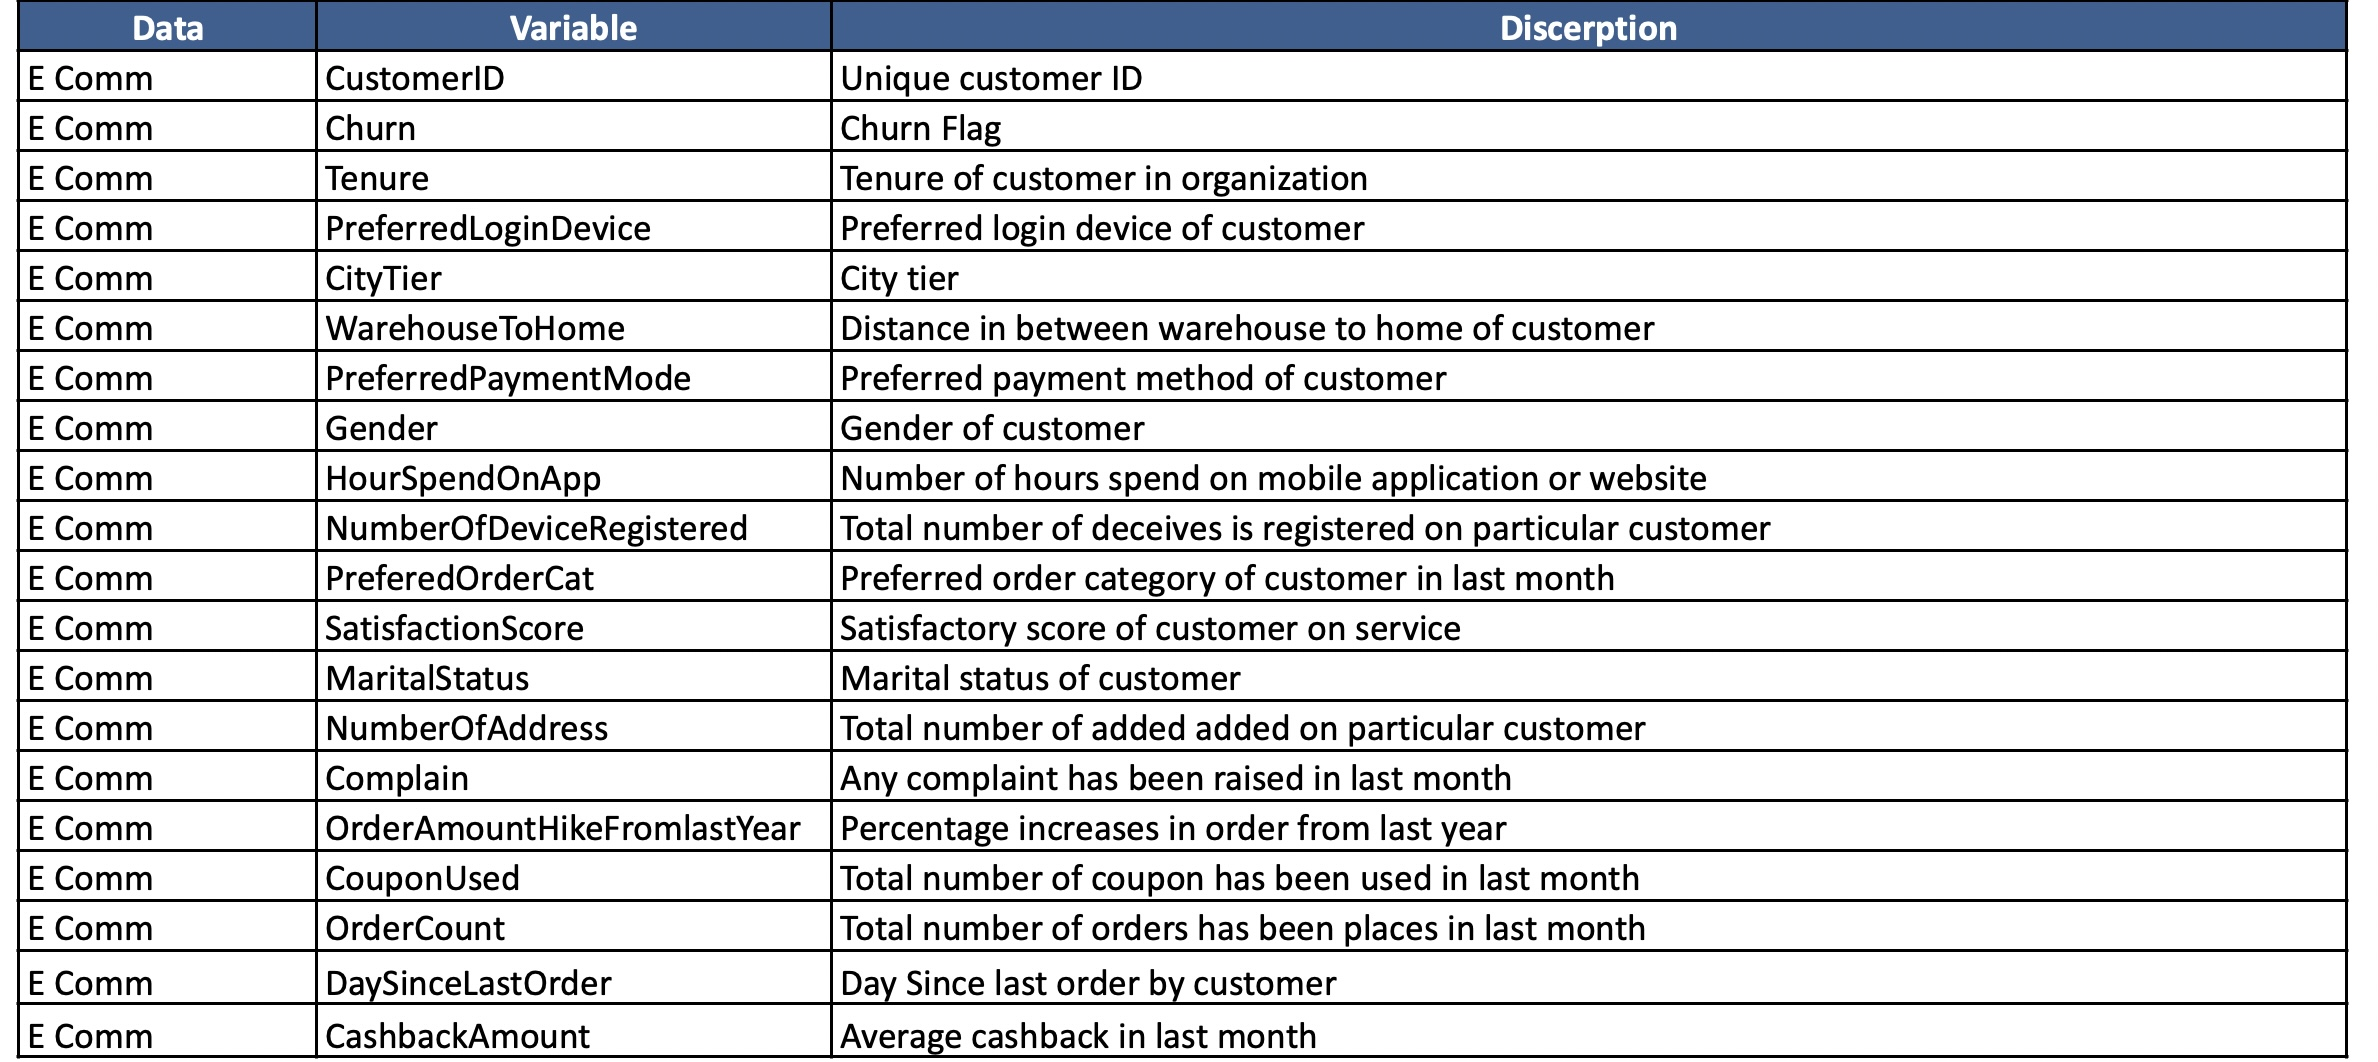

In [2991]:
from IPython.display import Image
Image("churn_analysis_variables.jpg")

In [2993]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve,\
roc_auc_score, roc_curve, fbeta_score, cohen_kappa_score, matthews_corrcoef
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2995]:
df = pd.read_csv('churn_analysis.csv')

In [2997]:
df

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
4499       55626      0    10.0             Computer         1   
4500       55627      0    13.0         Mobile Phone         1   
4501       55628      0     1.0         Mobile Phone         1   
4502       55629      0    23.0             Computer         3   
4503       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
4499             30.0          Credit Card    Male             3.0   
4500             13.0          Credit Card    Male             3.0   
4501             11.0           Debit Card    Male             3.0   
4502              9.0          Credit Card    Male             4.0   
4503             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
4499                         2  Laptop & Accessory                  1   
4500                         5             Fashion                  5   
4501                         2  Laptop & Accessory                  4   
4502                         5  Laptop & Accessory                  4   
4503                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
4499       Married                6         0                         18.0   
4500       Married                6         0                         16.0   
4501       Married                3         1                         21.0   
4502       Married                4         0                         15.0   
4503       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0             160  
1            0.0         1.0                0.0             121  
2            0.0         1.0                3.0             120  
3            0.0         1.0                3.0             134  
4            1.0         1.0                3.0             130  
...          ...         ...                ...             ...  
4499         1.0         2.0                4.0             151  
4500         1.0         2.0  

<h2>Data preparation</h2>

In [3000]:
missing_values = df.isna().sum()
missing_values

CustomerID                       0
Churn                            0
Tenure                         216
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                203
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 206
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    216
CouponUsed                     203
OrderCount                     207
DaySinceLastOrder              230
CashbackAmount                   0
dtype: int64

Several variables contain null values. We'll fix this. First, let's check the data for normal distribution.

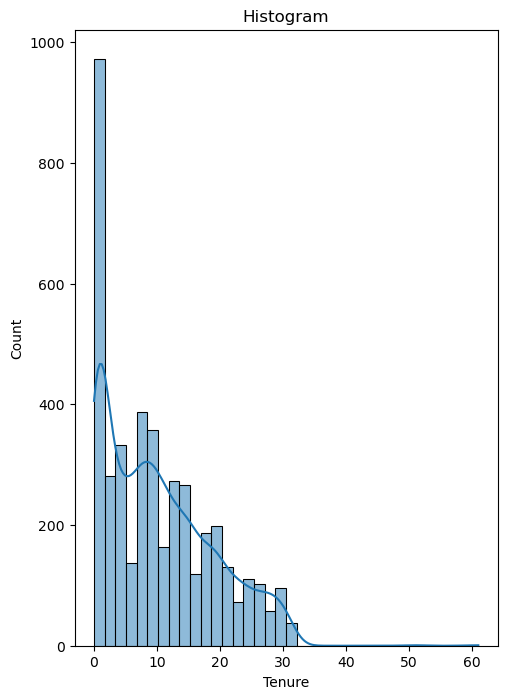

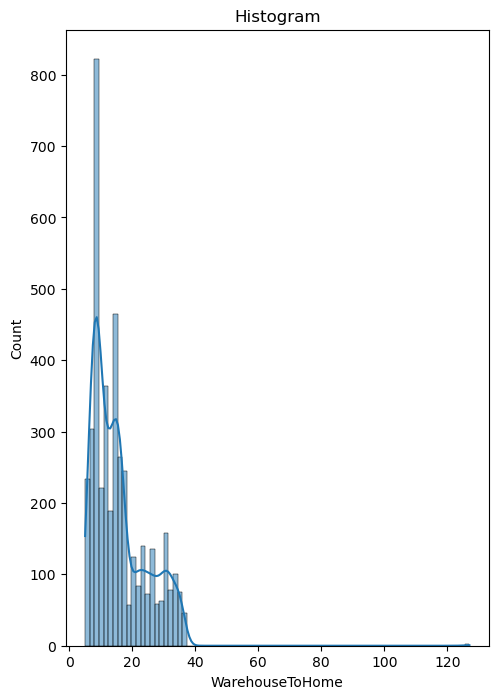

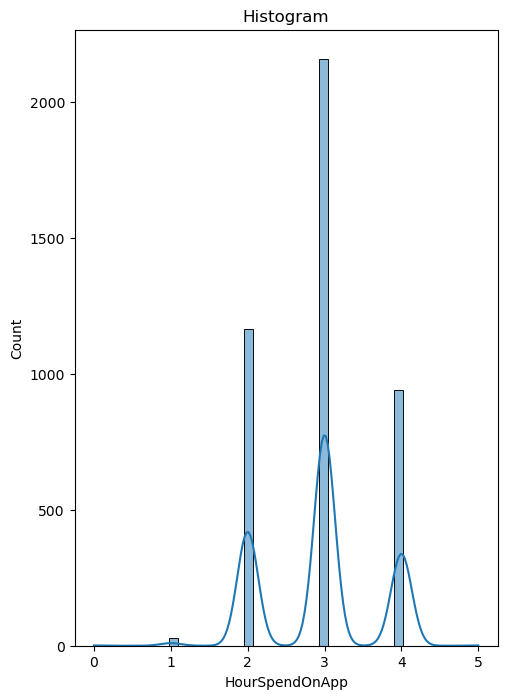

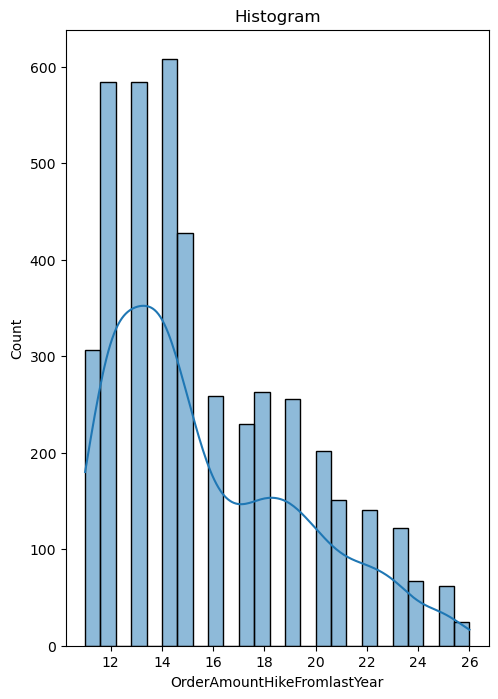

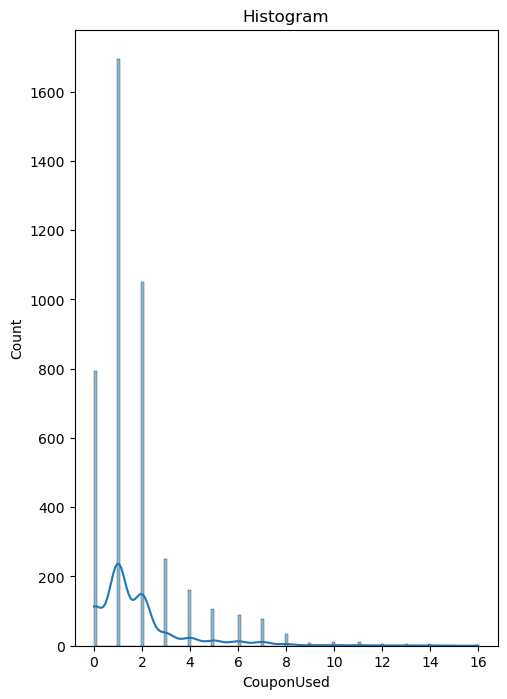

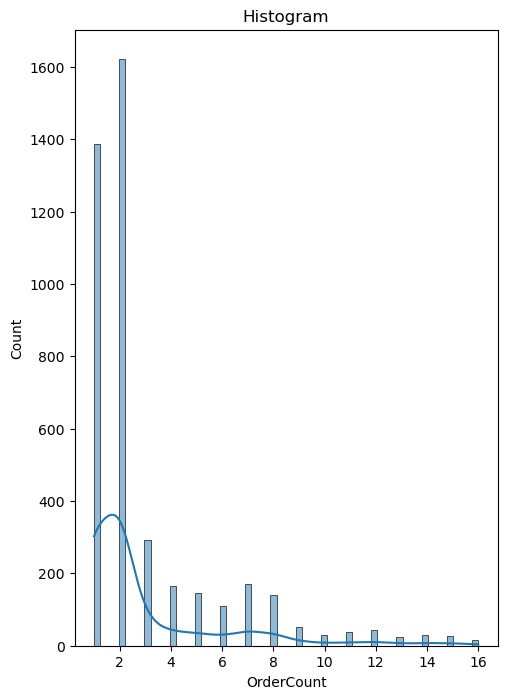

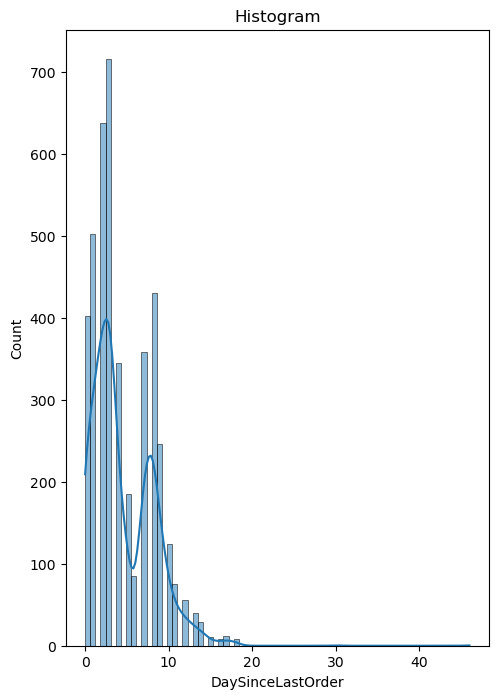

In [3005]:
columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in columns:
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title('Histogram')
    plt.show()

The distribution is not normal and the data contains outliers, so we decide to replace the missing values with the median.

In [3008]:
for column in columns:
    df[column].fillna(df[column].median(), inplace=True)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2621601603.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [3010]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [3012]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   4504.000000  4504.000000  4504.000000  4504.000000      4504.000000   
mean   52834.729796     0.169405    10.146314     1.659192        15.610568   
std     1622.681446     0.375151     8.413616     0.916920         8.434684   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51442.750000     0.000000     3.000000     1.000000         9.000000   
50%    52840.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.250000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     4504.000000               4504.000000        4504.000000   
mean         2.937389                  3.689387           3.061723   
std          0.704723                  1.023210           1.379624   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear  CouponUsed  \
count      4504.000000  4504.000000                  4504.000000  4504.00000   
mean          4.196714     0.287078                    15.700933     1.73468   
std           2.572930     0.452449                     3.600656     1.85518   
min           1.000000     0.000000                    11.000000     0.00000   
25%           2.000000     0.000000                    13.000000     1.00000   
50%           3.000000     0.000000                    15.000000     1.00000   
75%           6.000000     1.000000                    18.000000     2.00000   
max          22.000000     1.000000                    26.000000    16.00000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  4504.000000        4504.000000     4504.000000  
mean      2.979796           4.434281      177.144982  
std       2.884988           3.551047       49.109065  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      164.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

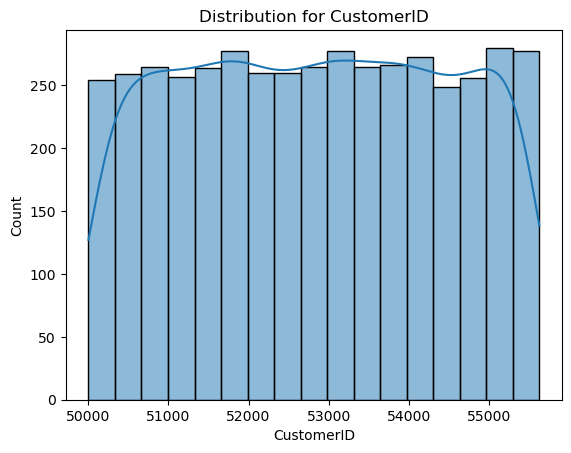

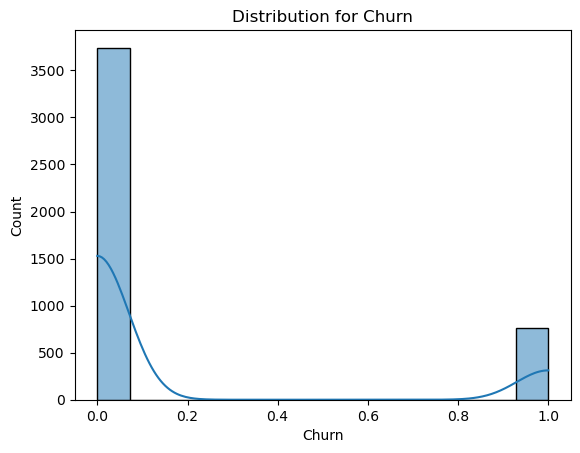

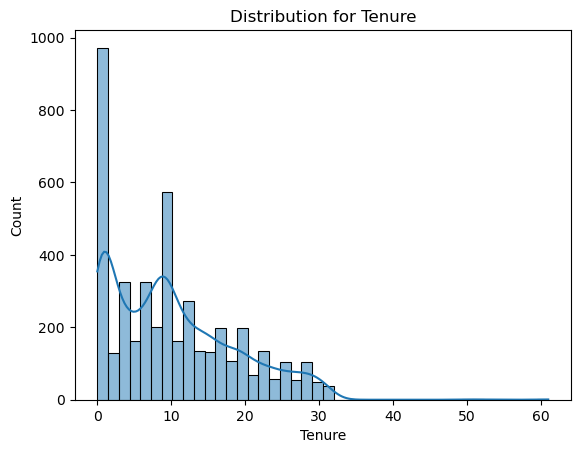

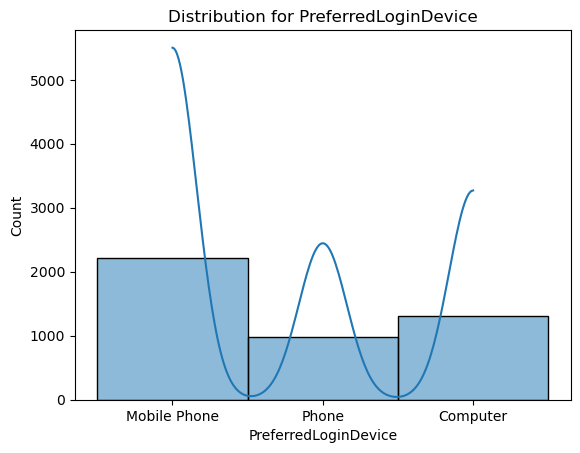

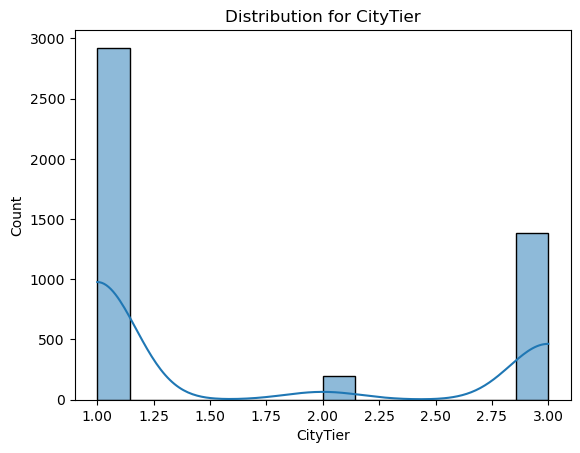

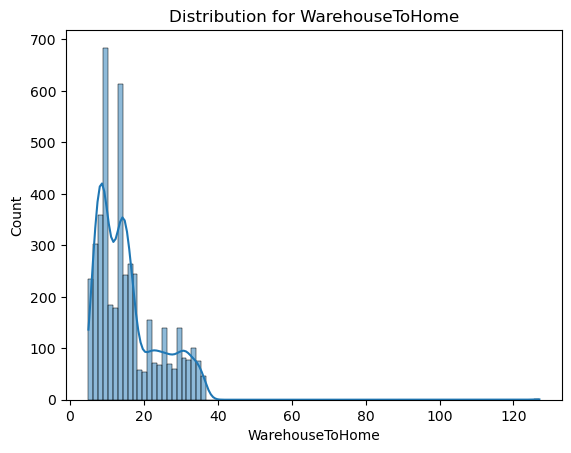

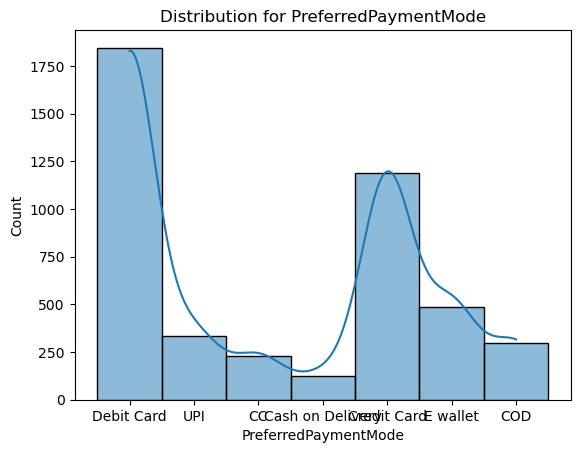

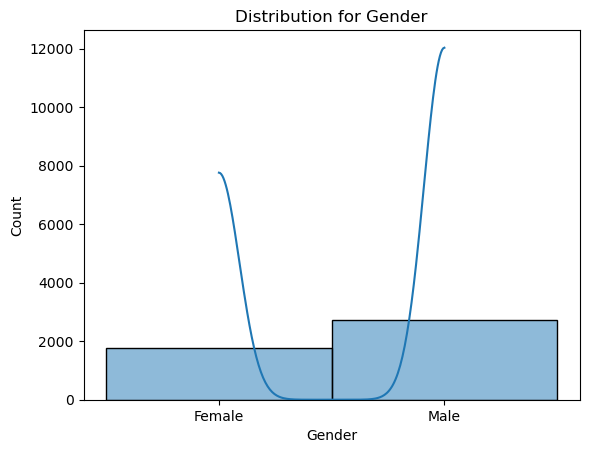

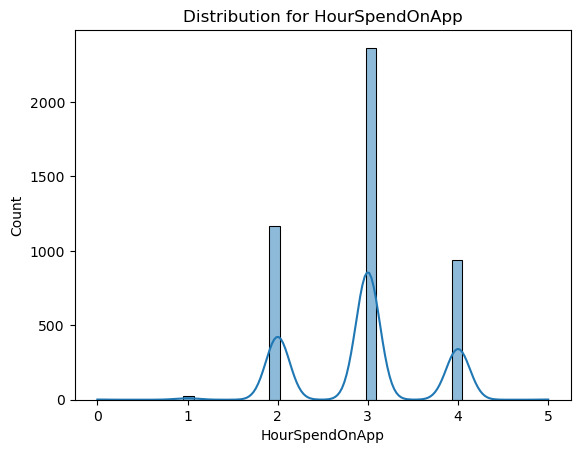

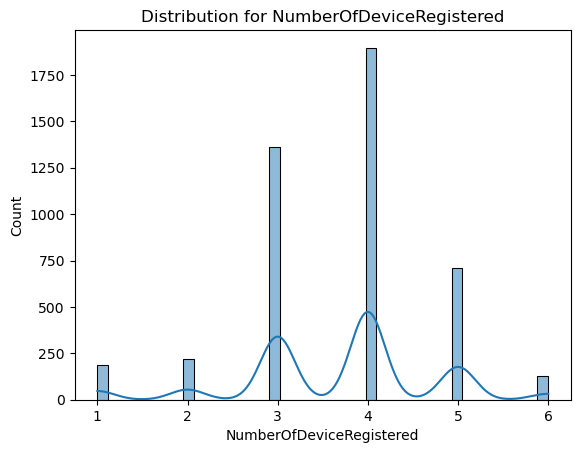

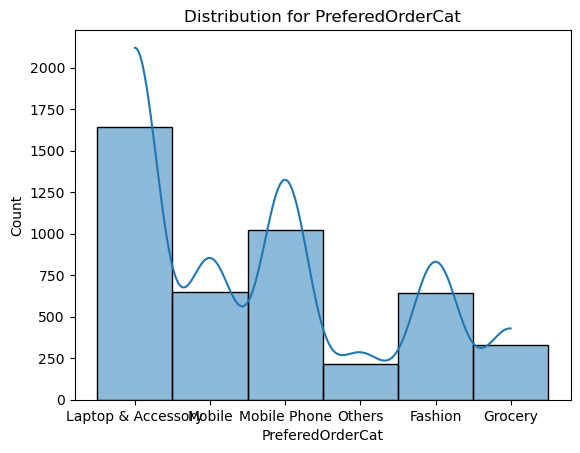

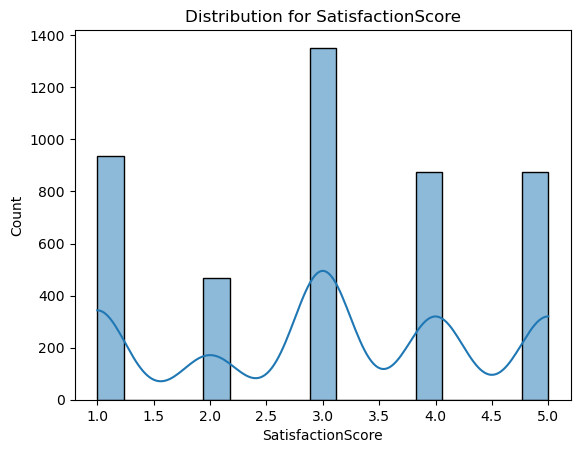

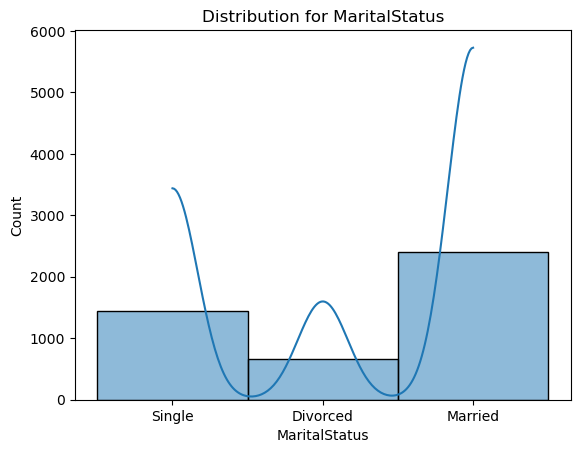

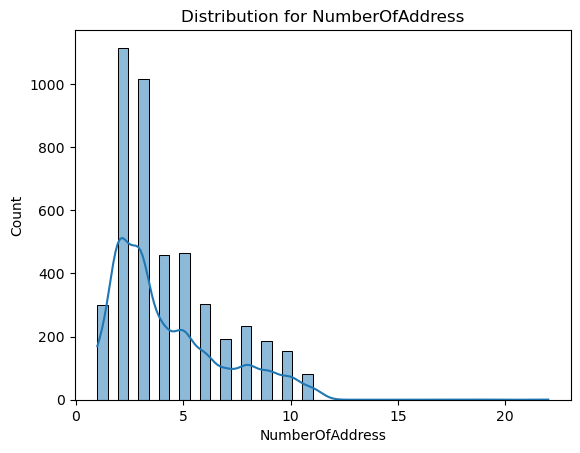

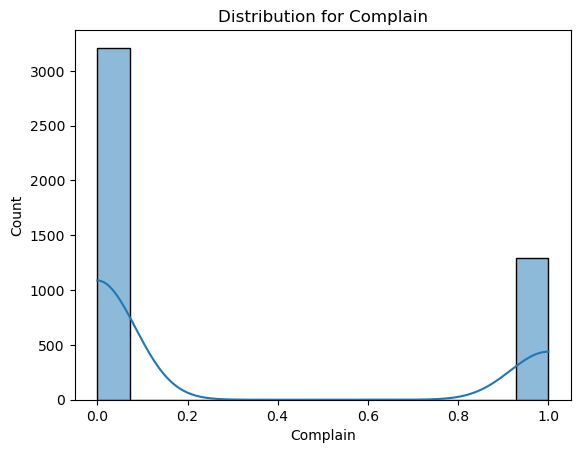

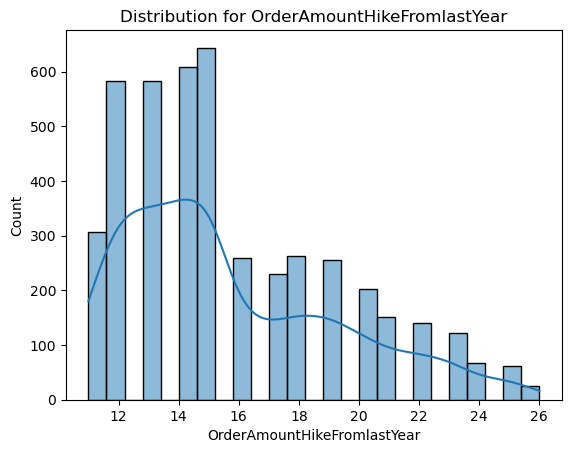

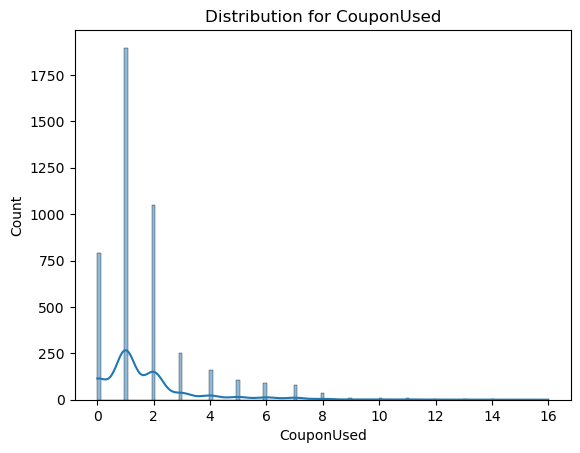

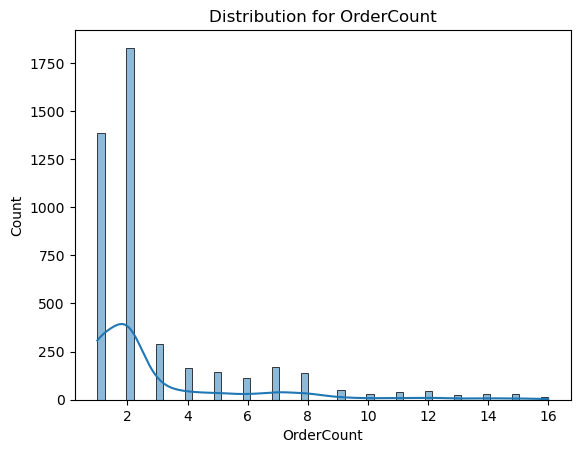

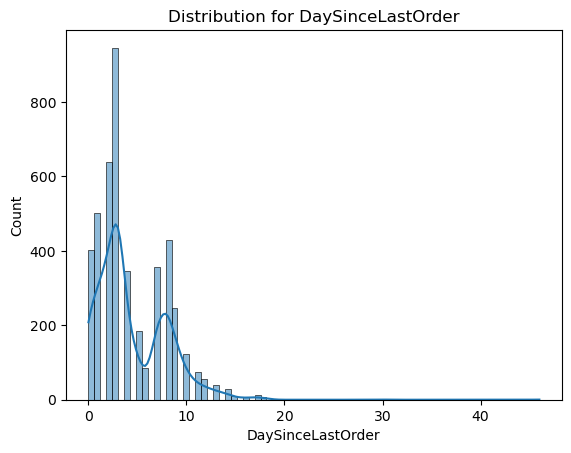

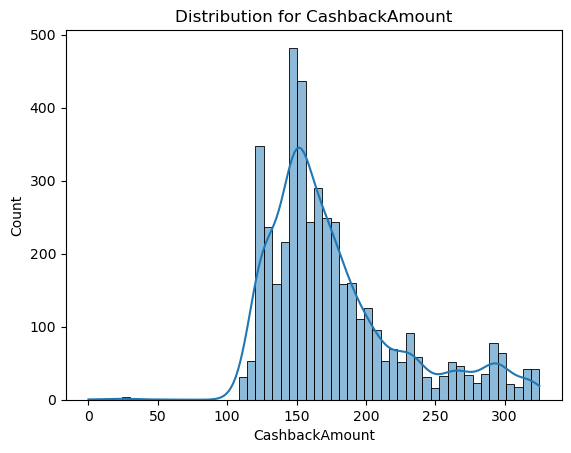

In [3014]:
for column in df.columns:
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

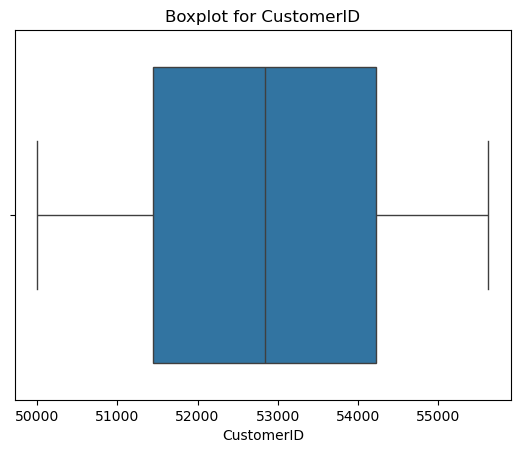

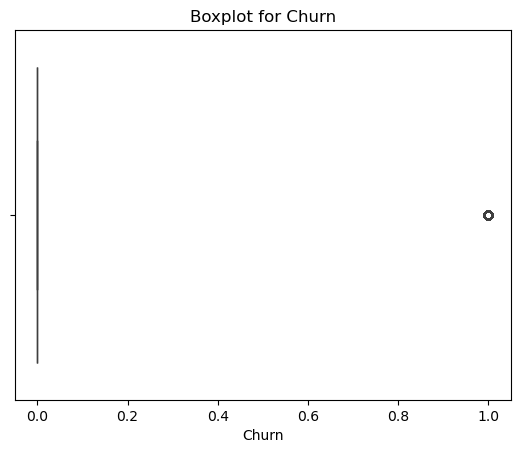

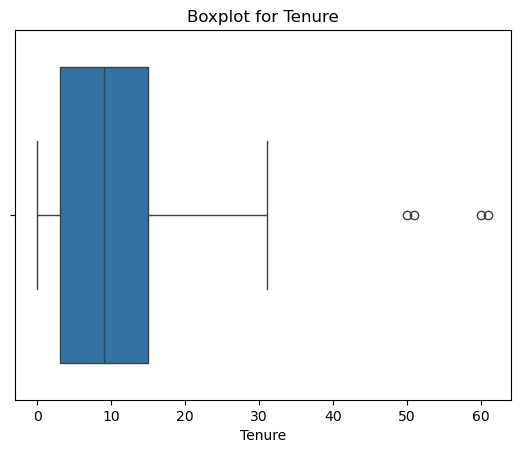

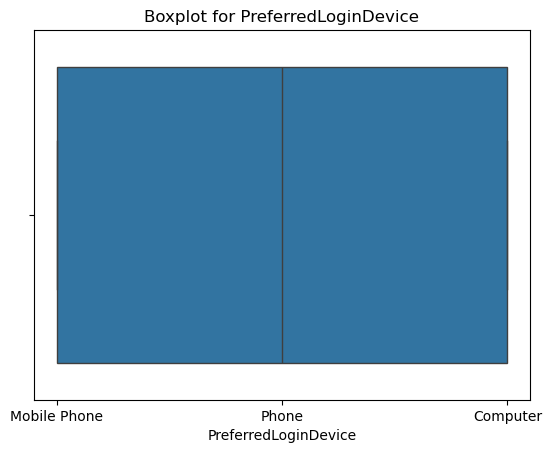

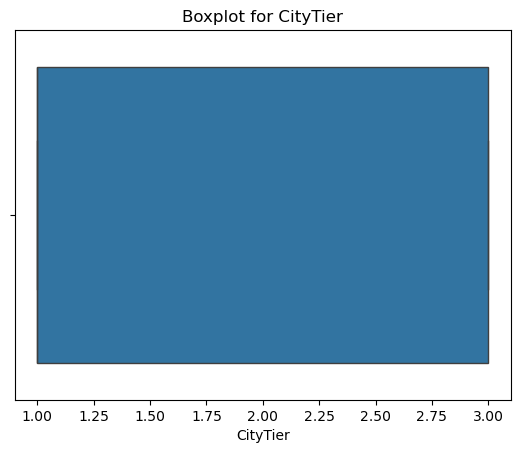

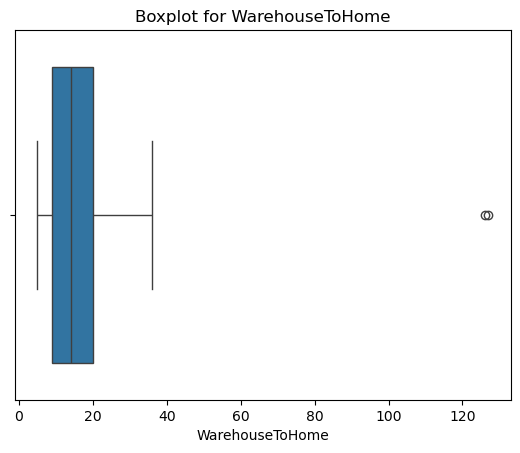

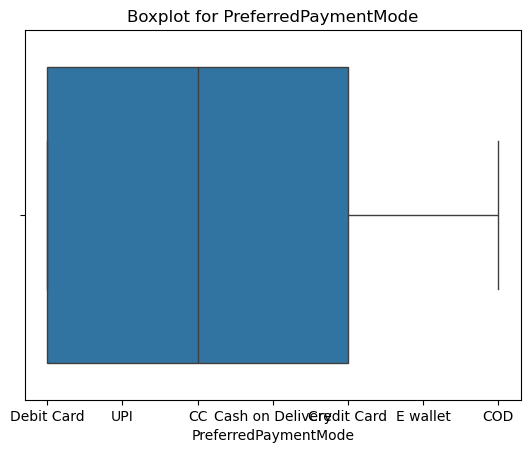

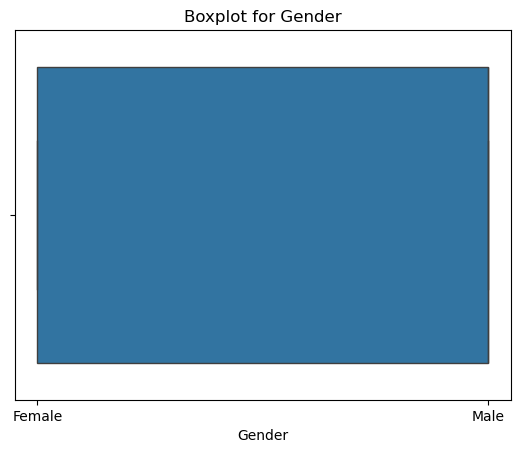

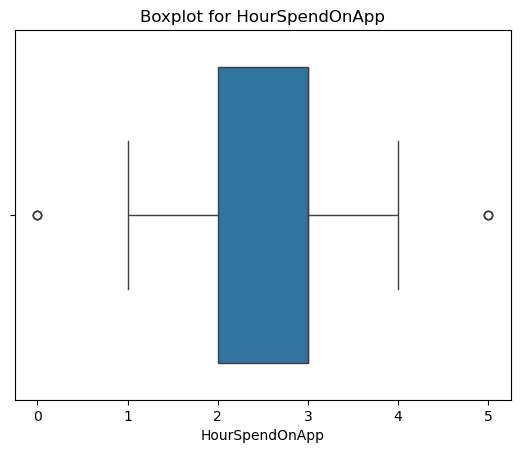

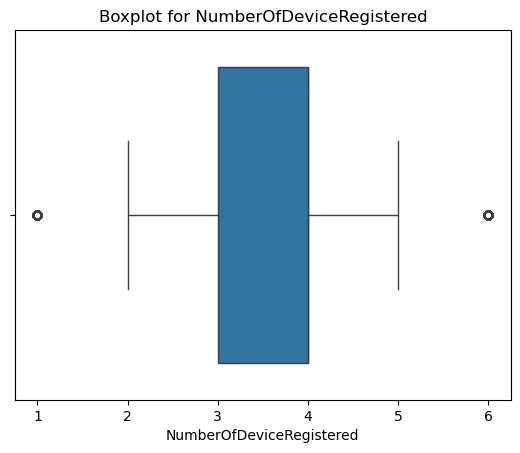

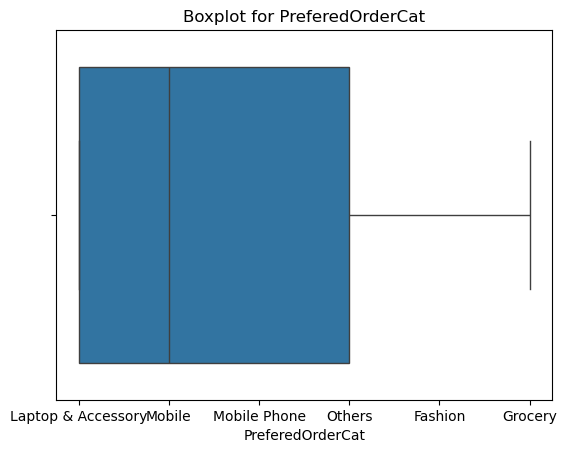

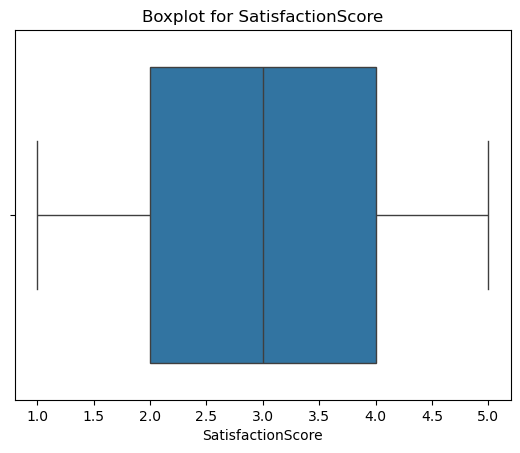

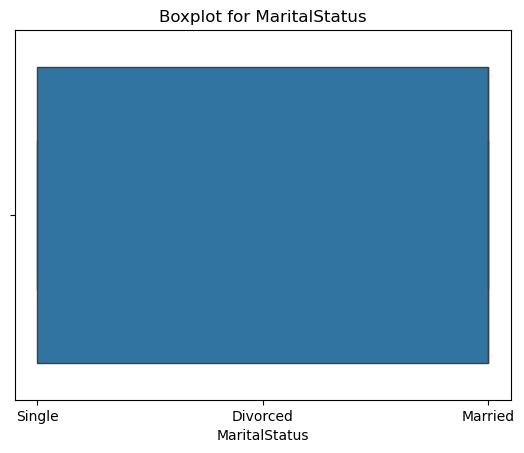

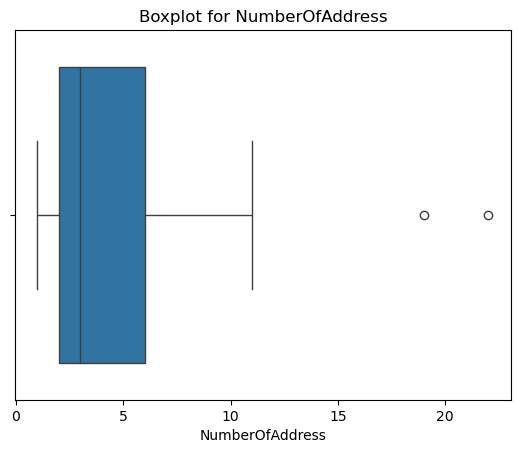

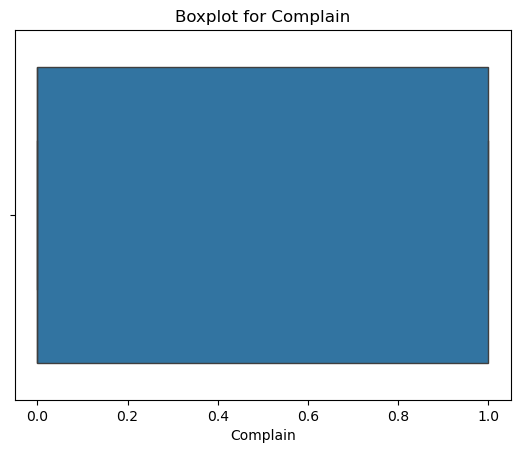

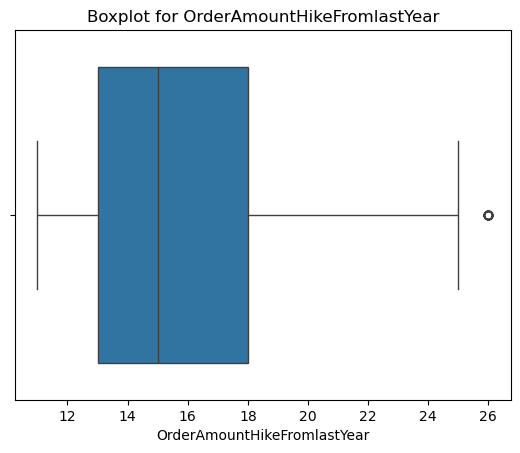

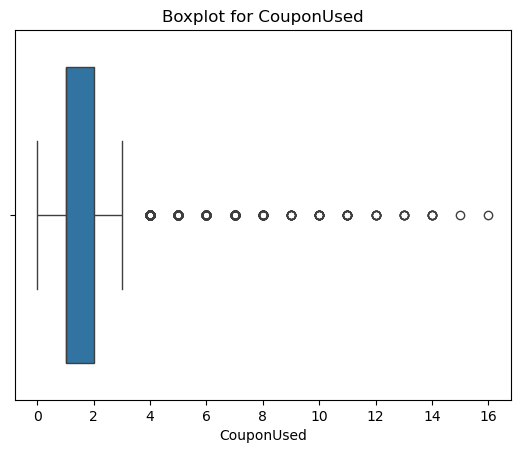

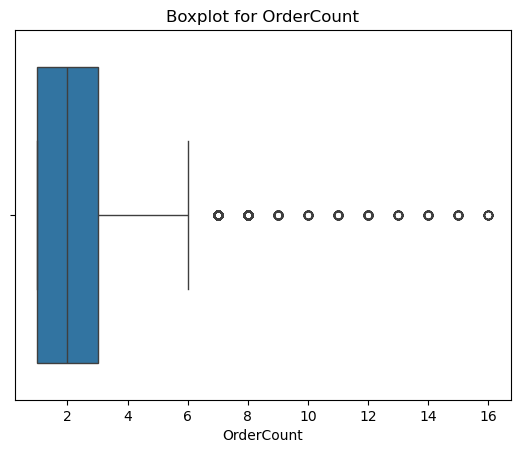

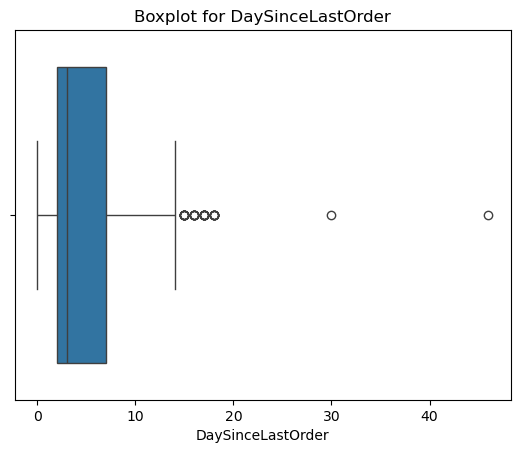

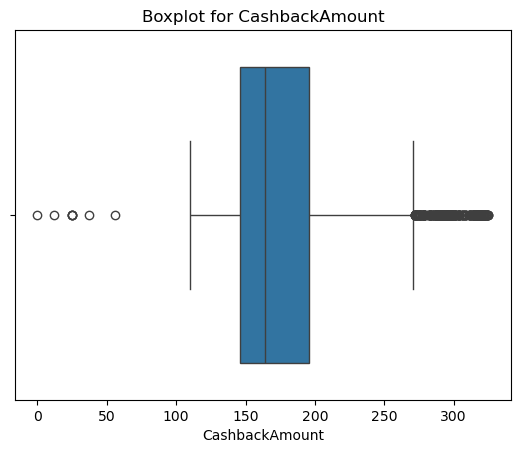

In [3015]:
for column in df.columns:
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

The data is not normally distributed, and some variables have outliers that are not errors. Outliers may hold valuable information, so they should be included in the analysis. The data should be analyzed considering its actual distribution. In the subsequent analysis, we will use methods that are robust to non-normal data distribution and resistant to outliers.

In [3018]:
df.duplicated().sum()

0

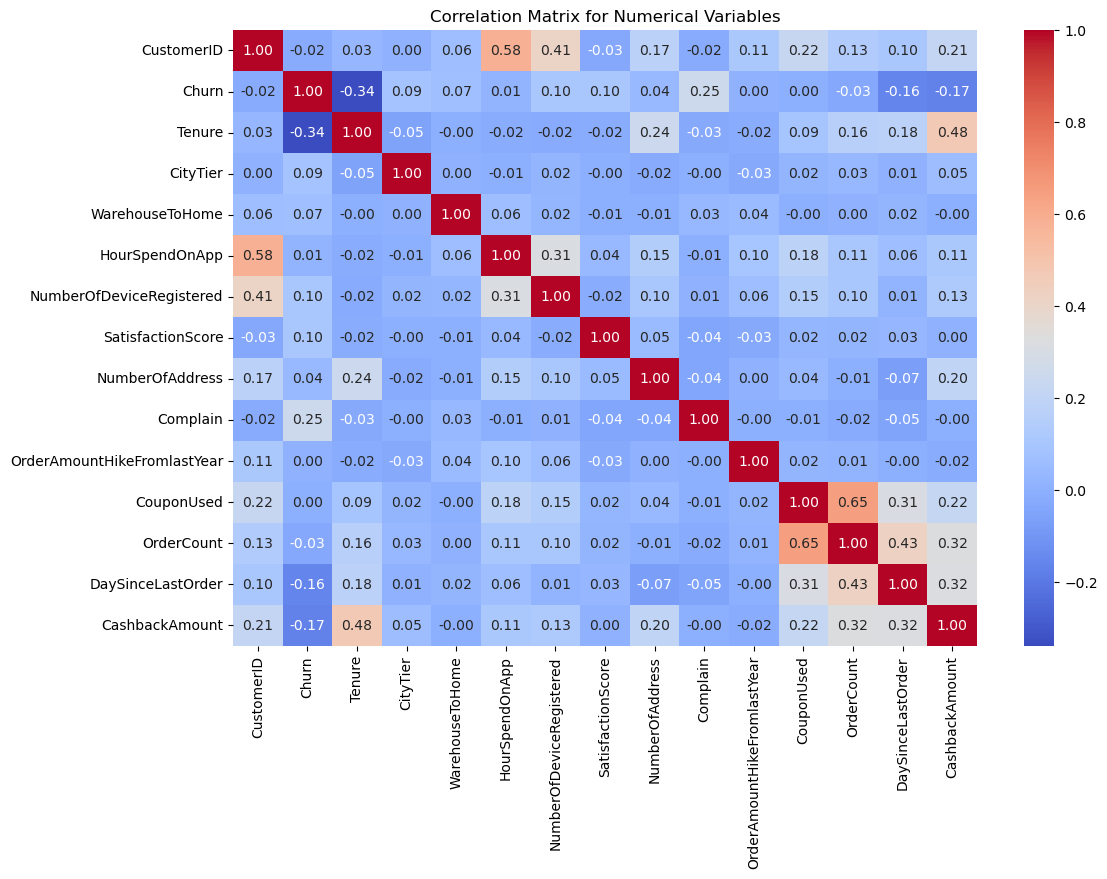

In [3021]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

<h3>Based on the provided correlations, the following initial conclusions can be drawn:<br></h3> A correlation of 0.65 between the variables CouponUsed (use of coupons) and OrderCount (number of orders) indicates a strong positive relationship. This means that an increase in the number of coupons used is associated with a rise in the number of orders.<br> <br> DaysSinceLastOrder and OrderCount (0.43): A moderate positive correlation suggests that customers who place orders more frequently (high OrderCount) spend less time between orders (DaysSinceLastOrder).<br>
CashbackAmount and Tenure (0.48): A moderate positive correlation indicates that customers who receive higher cashback amounts (CashbackAmount) are often those with longer tenures (Tenure).<br>
NumberOfDeviceRegister and HoursSpendOnApp (0.31): A weak positive correlation suggests that customers with more registered devices spend slightly more time using the app.<br>
A weak positive correlation (0.25) implies that customers with more complaints (Complain) are somewhat less likely to leave the service (Churn).<br>
A weak positive correlation (0.31) may suggest that customers who order less frequently (higher DaysSinceLastOrder) tend to use coupons more often (CouponUsed).<br>
DaysSinceLastOrder and CashbackAmount (0.32): A weak positive correlation might indicate that customers who place orders less frequently receive slightly higher cashback amounts.<br>
The correlation between OrderCount (number of orders) and CashbackAmount (cashback amount), equal to 0.32, suggests a moderate positive relationship. This means that as the number of orders increases, the cashback amount tends to slightly increase.
Other correlations are extremely small, making it difficult to draw meaningful conclusions.

We encode categorical variables using the One-Hot Encoding method since these variables do not have a natural order.

In [3025]:
df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])

In [3027]:
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

We normalize numerical variables to ensure consistency in scale. For variables with a small range, we use Min-Max Scaler. For other data, since they do not follow a normal distribution and contain outliers, we first apply Robust Scaler and then Min-Max Scaler to bring them to a common scale.

In [3030]:
scaler = RobustScaler()
df['Tenure'] = scaler.fit_transform(df[['Tenure']])
df['WarehouseToHome'] = scaler.fit_transform(df[['WarehouseToHome']])
df['CashbackAmount'] = scaler.fit_transform(df[['CashbackAmount']])
df['NumberOfAddress'] = scaler.fit_transform(df[['NumberOfAddress']])
df['OrderAmountHikeFromlastYear'] = scaler.fit_transform(df[['OrderAmountHikeFromlastYear']])
df['CouponUsed'] = scaler.fit_transform(df[['CouponUsed']])
df['OrderCount'] = scaler.fit_transform(df[['OrderCount']])
df['DaySinceLastOrder'] = scaler.fit_transform(df[['DaySinceLastOrder']])

scaler = MinMaxScaler()
df['HourSpendOnApp'] = scaler.fit_transform(df[['HourSpendOnApp']])
df['NumberOfDeviceRegistered'] = scaler.fit_transform(df[['NumberOfDeviceRegistered']])
df['SatisfactionScore'] = scaler.fit_transform(df[['SatisfactionScore']])

df['Tenure'] = scaler.fit_transform(df[['Tenure']])
df['WarehouseToHome'] = scaler.fit_transform(df[['WarehouseToHome']])
df['CashbackAmount'] = scaler.fit_transform(df[['CashbackAmount']])
df['NumberOfAddress'] = scaler.fit_transform(df[['NumberOfAddress']])
df['OrderAmountHikeFromlastYear'] = scaler.fit_transform(df[['OrderAmountHikeFromlastYear']])
df['CouponUsed'] = scaler.fit_transform(df[['CouponUsed']])
df['OrderCount'] = scaler.fit_transform(df[['OrderCount']])
df['DaySinceLastOrder'] = scaler.fit_transform(df[['DaySinceLastOrder']])

In [3032]:
df

CustomerID  Churn    Tenure  WarehouseToHome  HourSpendOnApp  \
0          50001      1  0.065574         0.008197             0.6   
1          50002      1  0.147541         0.024590             0.6   
2          50003      1  0.147541         0.204918             0.4   
3          50004      1  0.000000         0.081967             0.4   
4          50005      1  0.000000         0.057377             0.6   
...          ...    ...       ...              ...             ...   
4499       55626      0  0.163934         0.204918             0.6   
4500       55627      0  0.213115         0.065574             0.6   
4501       55628      0  0.016393         0.049180             0.6   
4502       55629      0  0.377049         0.032787             0.8   
4503       55630      0  0.131148         0.081967             0.6   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          0.4               0.25         0.380952         1   
1                          0.6               0.50         0.285714         1   
2                          0.6               0.50         0.238095         1   
3                          0.6               1.00         0.333333         0   
4                          0.4               1.00         0.095238         0   
...                        ...                ...              ...       ...   
4499                       0.2               0.00         0.238095         0   
4500                       0.8               1.00         0.238095         0   
4501                       0.2               0.75         0.095238         1   
4502                       0.8               0.75         0.142857         0   
4503                       0.2               0.50         0.142857         0   

      OrderAmountHikeFromlastYear  ...  Gender_Male  PreferedOrderCat_Fashion  \
0                        0.000000  ...            0                         0   
1                        0.266667  ...            1                         0   
2                        0.200000  ...            1                         0   
3                        0.800000  ...            1                         0   
4                        0.000000  ...            1                         0   
...                           ...  ...          ...                       ...   
4499                     0.466667  ...            1                         0   
4500                     0.333333  ...            1                         1   
4501                     0.666667  ...            1                         0   
4502                     0.266667  ...            1                         0   
4503                     0.133333  ...            1                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                            0                                    1   
1                            0                                    0   
2                            0                                    0   
3                            0                                    1   
4                            0                                    0   
...                        ...                                  ...   
4499                         0                                    1   
4500                         0                                    0   
4501                         0                                    1   
4502                         0                                    1   
4503                         0                                    1   

      PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                           0                              0   
1                           1                              0   
2                           1                              0   
3                           0                              0   
4                           1                             

Data preparation is complete. Missing values have been handled, duplicates are absent, and outliers are retained as they contain important information. Variable values have been encoded and normalized.

<h2>Analysis of key churn factors.</h2>

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       741
           1       0.91      0.86      0.88       160

    accuracy                           0.96       901
   macro avg       0.94      0.92      0.93       901
weighted avg       0.96      0.96      0.96       901



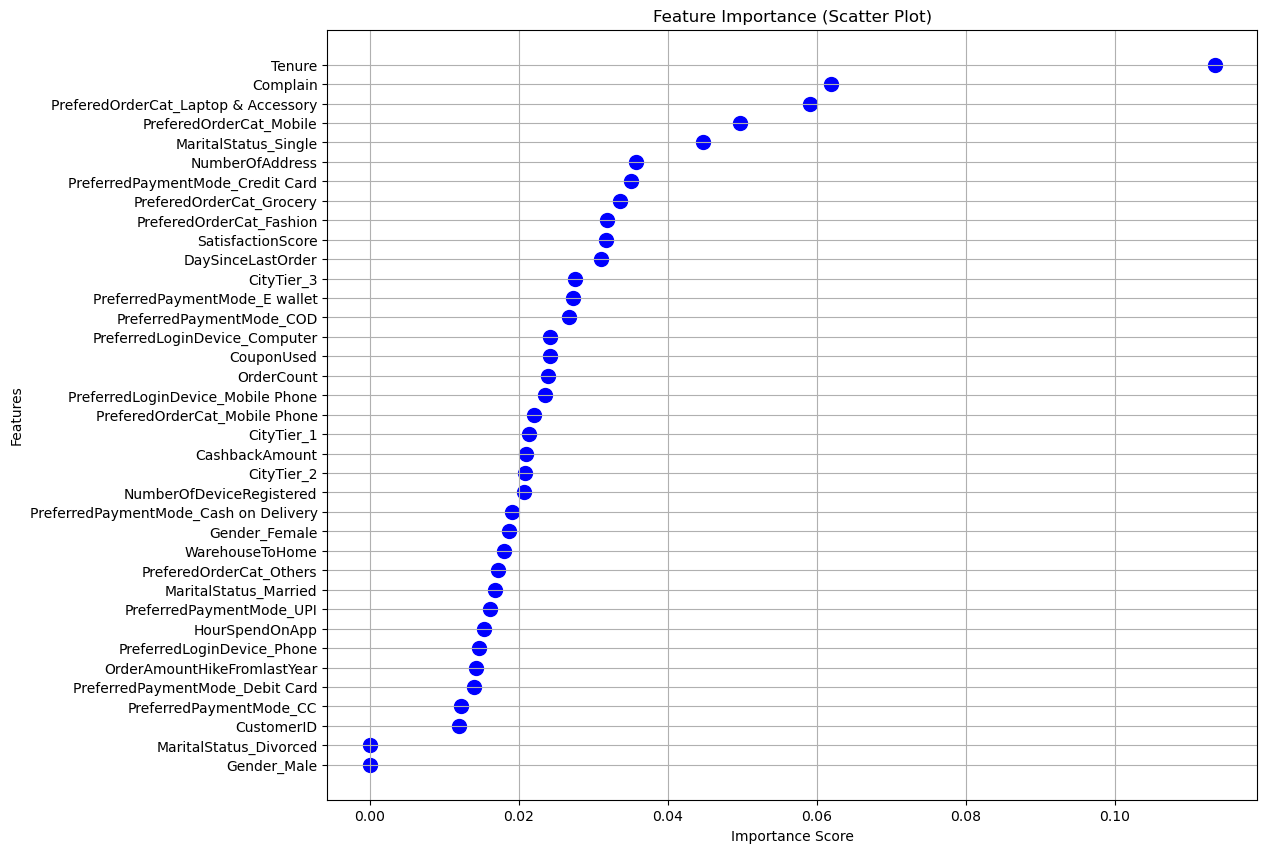

In [3036]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = model.feature_importances_
features = X.columns

features_sorted = [x for _, x in sorted(zip(feature_importance, features))]
importance_sorted = sorted(feature_importance)

plt.figure(figsize=(12, 10))
plt.scatter(importance_sorted, features_sorted, color='blue', s=100)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Scatter Plot)")
plt.grid()
plt.show()

The model has demonstrated high performance, achieving 96% accuracy, confidently handling the main task, and showing excellent metrics for the "no churn" class. However, its recall for the "churn" class is slightly lower, indicating the need for further optimization. Overall, the model is reliable and suitable for predictions, but its performance in critical cases could be improved.

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/517431996.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/517431996.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




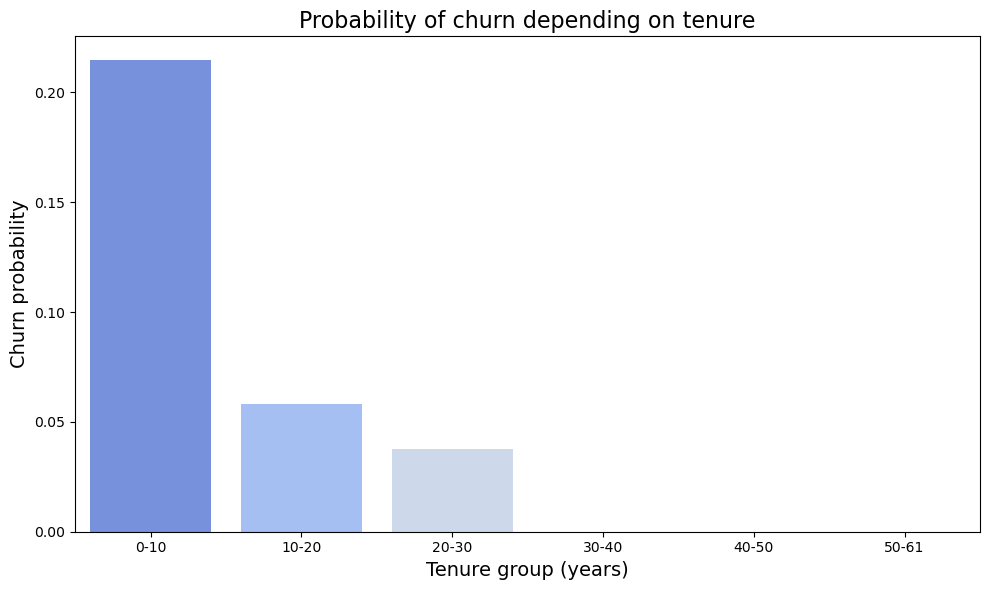

In [3040]:
original_min = 0  
original_max = 61   

df['OriginalTenure'] = df['Tenure'] * (original_max - original_min) + original_min

df['TenureGroup'] = pd.cut(df['OriginalTenure'], bins=[0, 10, 20, 30, 40, 50, 61], 
                           labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-61'])

churn_rate = df.groupby('TenureGroup')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TenureGroup', y='Churn', data=churn_rate, palette="coolwarm")
plt.title("Probability of churn depending on tenure", fontsize=16)
plt.xlabel("Tenure group (years)", fontsize=14)
plt.ylabel("Churn probability", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3953104104.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3953104104.py:4: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



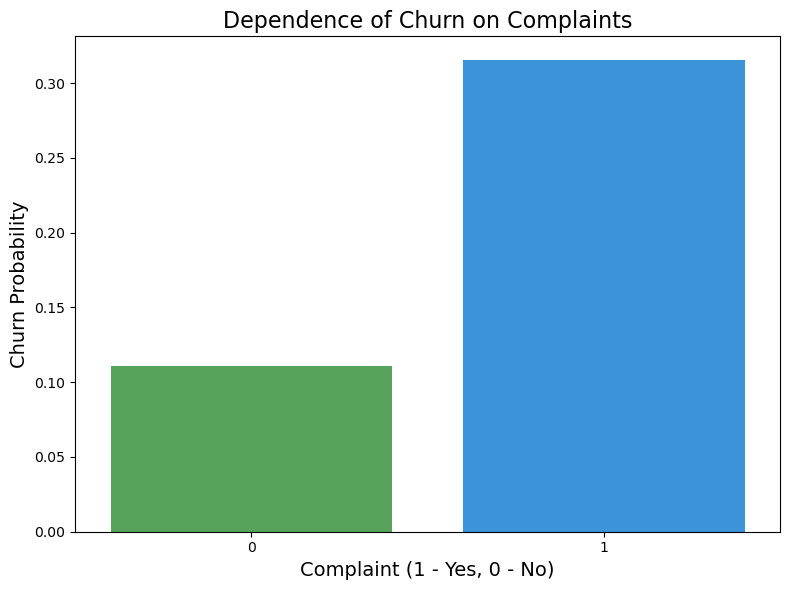

In [3042]:
complaint_churn_rate = df.groupby('Complain')['Churn'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Complain', y='Churn', data=complaint_churn_rate, palette=['#4CAF50', '#2196F3', '#FFC107'])
plt.title("Dependence of Churn on Complaints", fontsize=16)
plt.xlabel("Complaint (1 - Yes, 0 - No)", fontsize=14)
plt.ylabel("Churn Probability", fontsize=14)
plt.tight_layout()
plt.show()

In [3044]:
original_min = 1
original_max = 22

df['OriginalNumberOfAddress'] = df['NumberOfAddress'] * (original_max - original_min) + original_min

df['AddressGroup'] = pd.cut(df['OriginalNumberOfAddress'], 
                            bins=[1, 5, 10, 15, 20, 22], 
                            labels=['1-5 addresses', '6-10 addresses', '11-15 addresses', '16-20 addresses', '21-22 addresses'])

group_analysis = df.groupby('AddressGroup')['Churn'].mean().reset_index()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/1533607792.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2318076606.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2318076606.py:2: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.



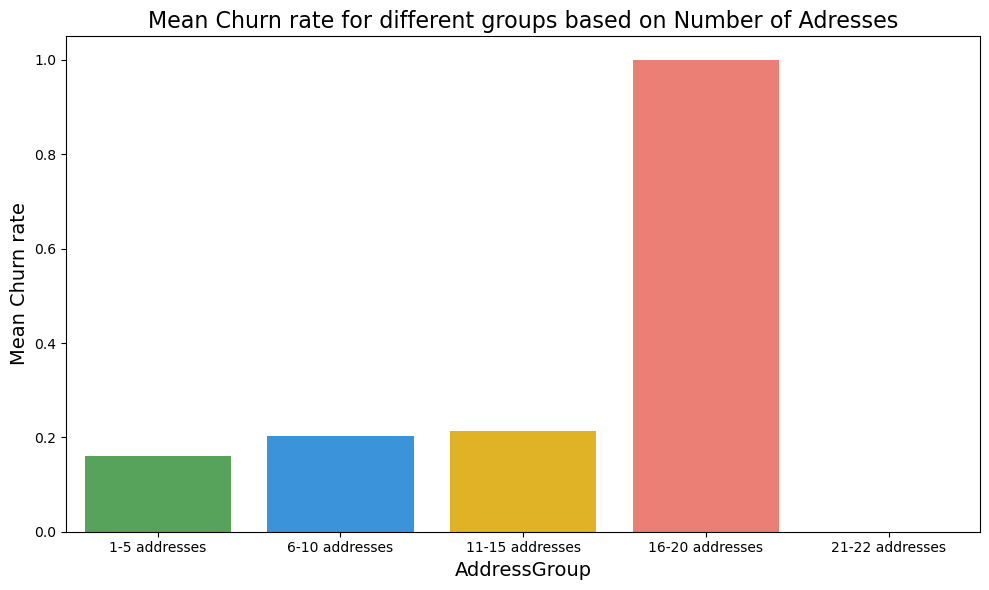

In [3046]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AddressGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61'])
plt.title("Mean Churn rate for different groups based on Number of Adresses", fontsize=16)
plt.xlabel("AddressGroup", fontsize=14)
plt.ylabel("Mean Churn rate", fontsize=14)
plt.tight_layout()
plt.show()

In [3048]:
original_min = 5  
original_max = 130 

df['OriginalWarehouseToHome'] = df['WarehouseToHome'] * (original_max - original_min) + original_min

df['WarehouseToHomeGroup'] = pd.cut(df['OriginalWarehouseToHome'], 
                                    bins=[5, 25, 130], 
                                    labels=['5-25 km', '25+ km'])

group_analysis = df.groupby('WarehouseToHomeGroup')['Churn'].mean().reset_index()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2619048460.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/157121045.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/157121045.py:2: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



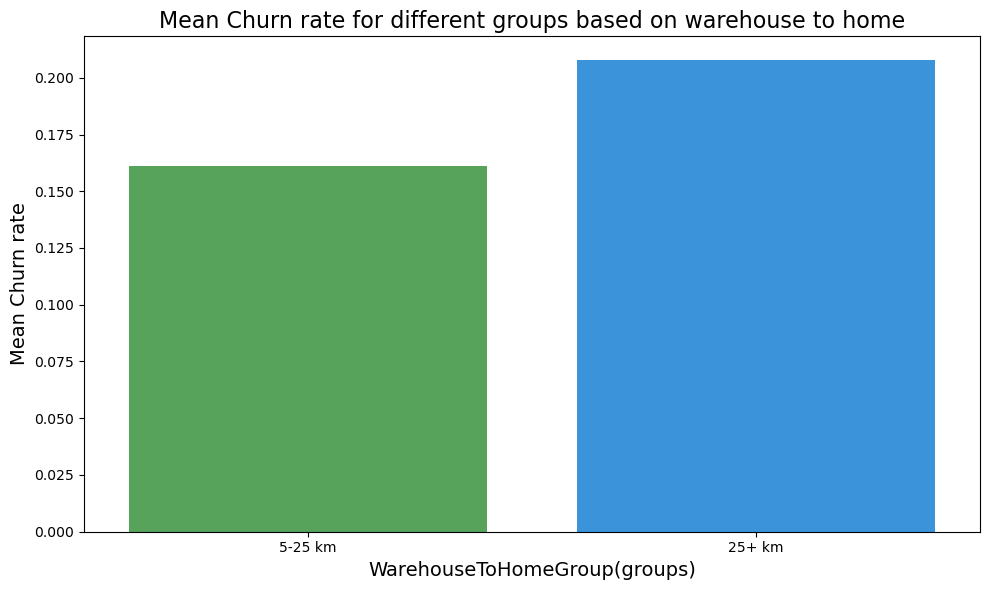

In [3050]:
plt.figure(figsize=(10, 6))
sns.barplot(x='WarehouseToHomeGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107'])
plt.title("Mean Churn rate for different groups based on warehouse to home", fontsize=16)
plt.xlabel("WarehouseToHomeGroup(groups)", fontsize=14)
plt.ylabel("Mean Churn rate", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/4230584025.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/4230584025.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




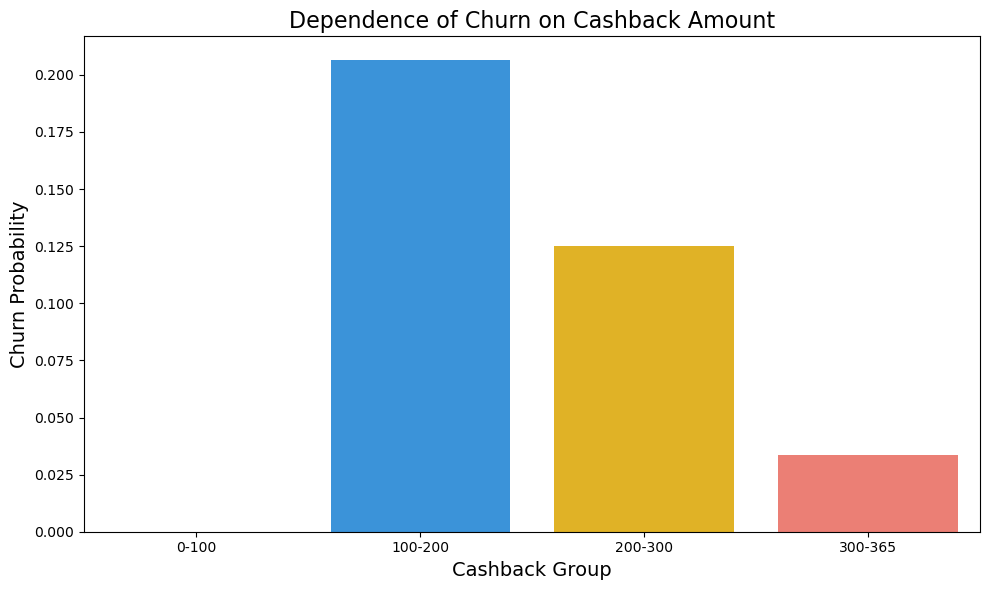

In [3052]:
original_min = 0
original_max = 365

df['OriginalCashbackAmount'] = df['CashbackAmount'] * (original_max - original_min) + original_min

df['CashbackGroup'] = pd.cut(df['OriginalCashbackAmount'], 
                             bins=[0, 100, 200, 300, 365], 
                             labels=['0-100', '100-200', '200-300', '300-365'])

cashback_analysis = df.groupby('CashbackGroup')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CashbackGroup', y='Churn', data=cashback_analysis, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61'])
plt.title("Dependence of Churn on Cashback Amount", fontsize=16)
plt.xlabel("Cashback Group", fontsize=14)
plt.ylabel("Churn Probability", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2061367440.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2061367440.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




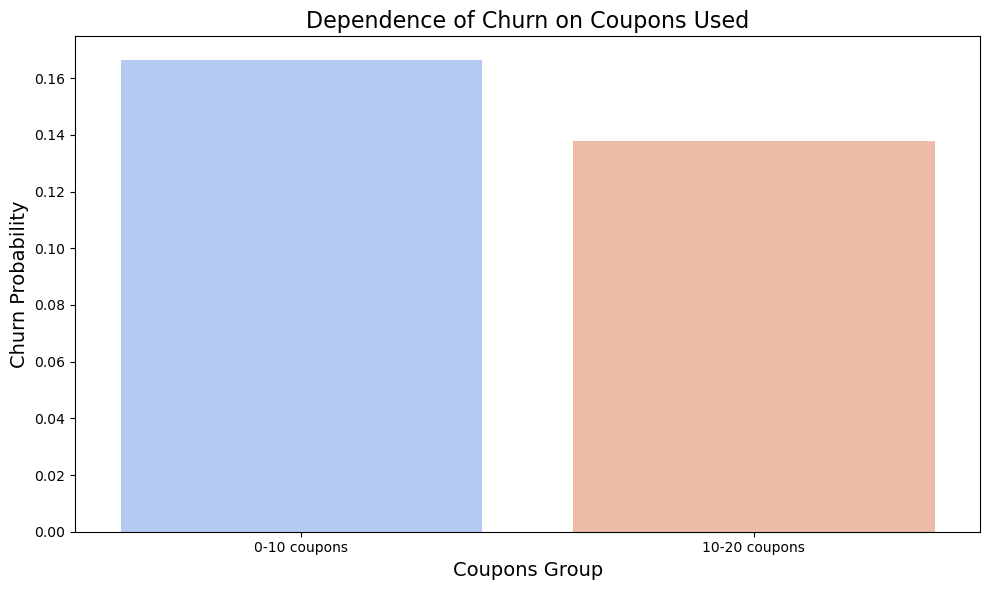

In [3054]:
original_min = 0  
original_max = 16 

df['OriginalCouponsUsed'] = df['CouponUsed'] * (original_max - original_min) + original_min

df['CouponGroup'] = pd.cut(df['OriginalCouponsUsed'], 
                            bins=[0, 10, 20], 
                            labels=['0-10 coupons', '10-20 coupons'])

coupons_analysis = df.groupby('CouponGroup')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CouponGroup', y='Churn', data=coupons_analysis, palette="coolwarm")
plt.title("Dependence of Churn on Coupons Used", fontsize=16)
plt.xlabel("Coupons Group", fontsize=14)
plt.ylabel("Churn Probability", fontsize=14)
plt.tight_layout()
plt.show()

In [3056]:
df = df.drop(columns=['OriginalCouponsUsed', 'OriginalCashbackAmount', 'OriginalWarehouseToHome', 'OriginalTenure', 'OriginalNumberOfAddress'])

<h4>Conclusions</h4>
Based on the analysis, the following conclusions can be drawn:<br>

Tenure:<br> The longer a customer stays with the company, the lower the likelihood of churn. This confirms that retaining new customers during the first months of interaction with the company is a critically important step.<br>

Complaints:<br> Users who submit complaints are significantly more likely to churn. This highlights the need for prompt responses to customer requests and improvements in service quality.<br>

Preferred Order Category:<br> Customers ordering laptops, accessories, and mobile devices tend to have higher expectations for products and services. Dissatisfaction in these categories can lead to increased churn.<br>

Marital Status (Single):<br> Single customers have greater flexibility in choosing alternative services, which increases their likelihood of churn. Special offers and loyalty programs can help retain such customers.<br>

Number of Addresses:<br> The more addresses a customer has, the higher the likelihood of churn. This may be related to logistical challenges or service inconveniences.<br>

Warehouse-to-Home Delivery Distance:<br> Customers with longer delivery distances are more likely to churn, indicating a need to optimize logistics or reduce delivery costs.<br>

Cashbacks:<br> Insufficient cashback incentives negatively impact customer retention. Reward programs, including more frequent or higher-value cashbacks, can enhance customer loyalty.<br>

Coupons Used:<br> Customers who use more coupons are less likely to churn, emphasizing the importance of promotions, discounts, and personalized offers.<br>

<h2>Model development</h2>

We choose the Random Forest algorithm as our model since it does not require a normal distribution of data, is robust to outliers, performs efficiently in classification tasks, resists overfitting, and works well with various types of data.

In [3063]:
X = df.drop(columns=['Churn', 'CustomerID', 'CouponGroup', 'CashbackGroup', 'WarehouseToHomeGroup', 'AddressGroup', 'TenureGroup'])
y = df['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       741
           1       0.93      0.79      0.86       160

    accuracy                           0.95       901
   macro avg       0.95      0.89      0.92       901
weighted avg       0.95      0.95      0.95       901

Confusion Matrix:
[[732   9]
 [ 33 127]]


Optimal threshold: 0.47


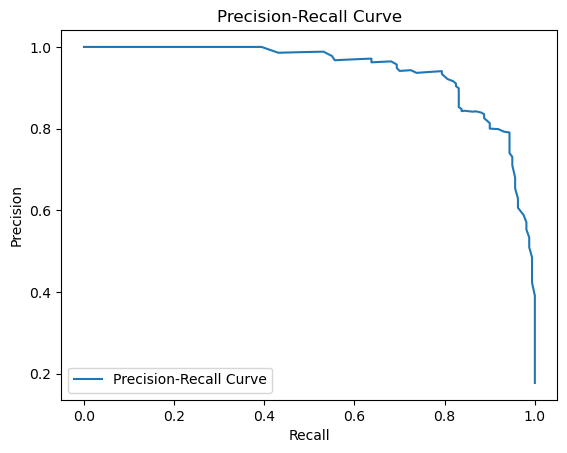

In [3065]:
y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores.argmax()]

print("Optimal threshold:", optimal_threshold)

plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [3067]:
y_pred_new = (y_prob >= optimal_threshold).astype(int)

print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       741
           1       0.91      0.82      0.87       160

    accuracy                           0.95       901
   macro avg       0.94      0.90      0.92       901
weighted avg       0.95      0.95      0.95       901



In [3069]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

print("Classification Report:")
print(classification_report(y_test, y_pred_new))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_new))

X_test['Churn_Probability'] = y_prob
X_test['Churn_Prediction'] = y_pred_new

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       741
           1       0.91      0.82      0.87       160

    accuracy                           0.95       901
   macro avg       0.94      0.90      0.92       901
weighted avg       0.95      0.95      0.95       901

Confusion Matrix:
[[728  13]
 [ 28 132]]


ROC-AUC Score: 0.983902665317139


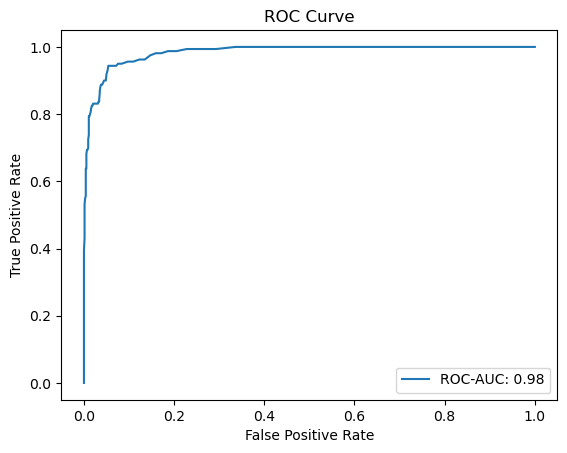

In [3071]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [3073]:
f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score: {f2_score}")

F2 Score: 0.8182989690721649


In [3075]:
X_test = X_test.drop(columns=['Churn_Prediction', 'Churn_Probability'])
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9533851276359601


In [3077]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-validation scores: [0.98113208 0.96781354 0.9700333  0.98113208 0.96666667]
Mean CV Score: 0.9733555308916019


In [3078]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.8304387568555759


In [3081]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.8343645357246637


The model performs exceptionally well, demonstrating excellent results across numerous key metrics. However, we will attempt to enhance it further by introducing new features—squaring existing ones and multiplying features with each other.

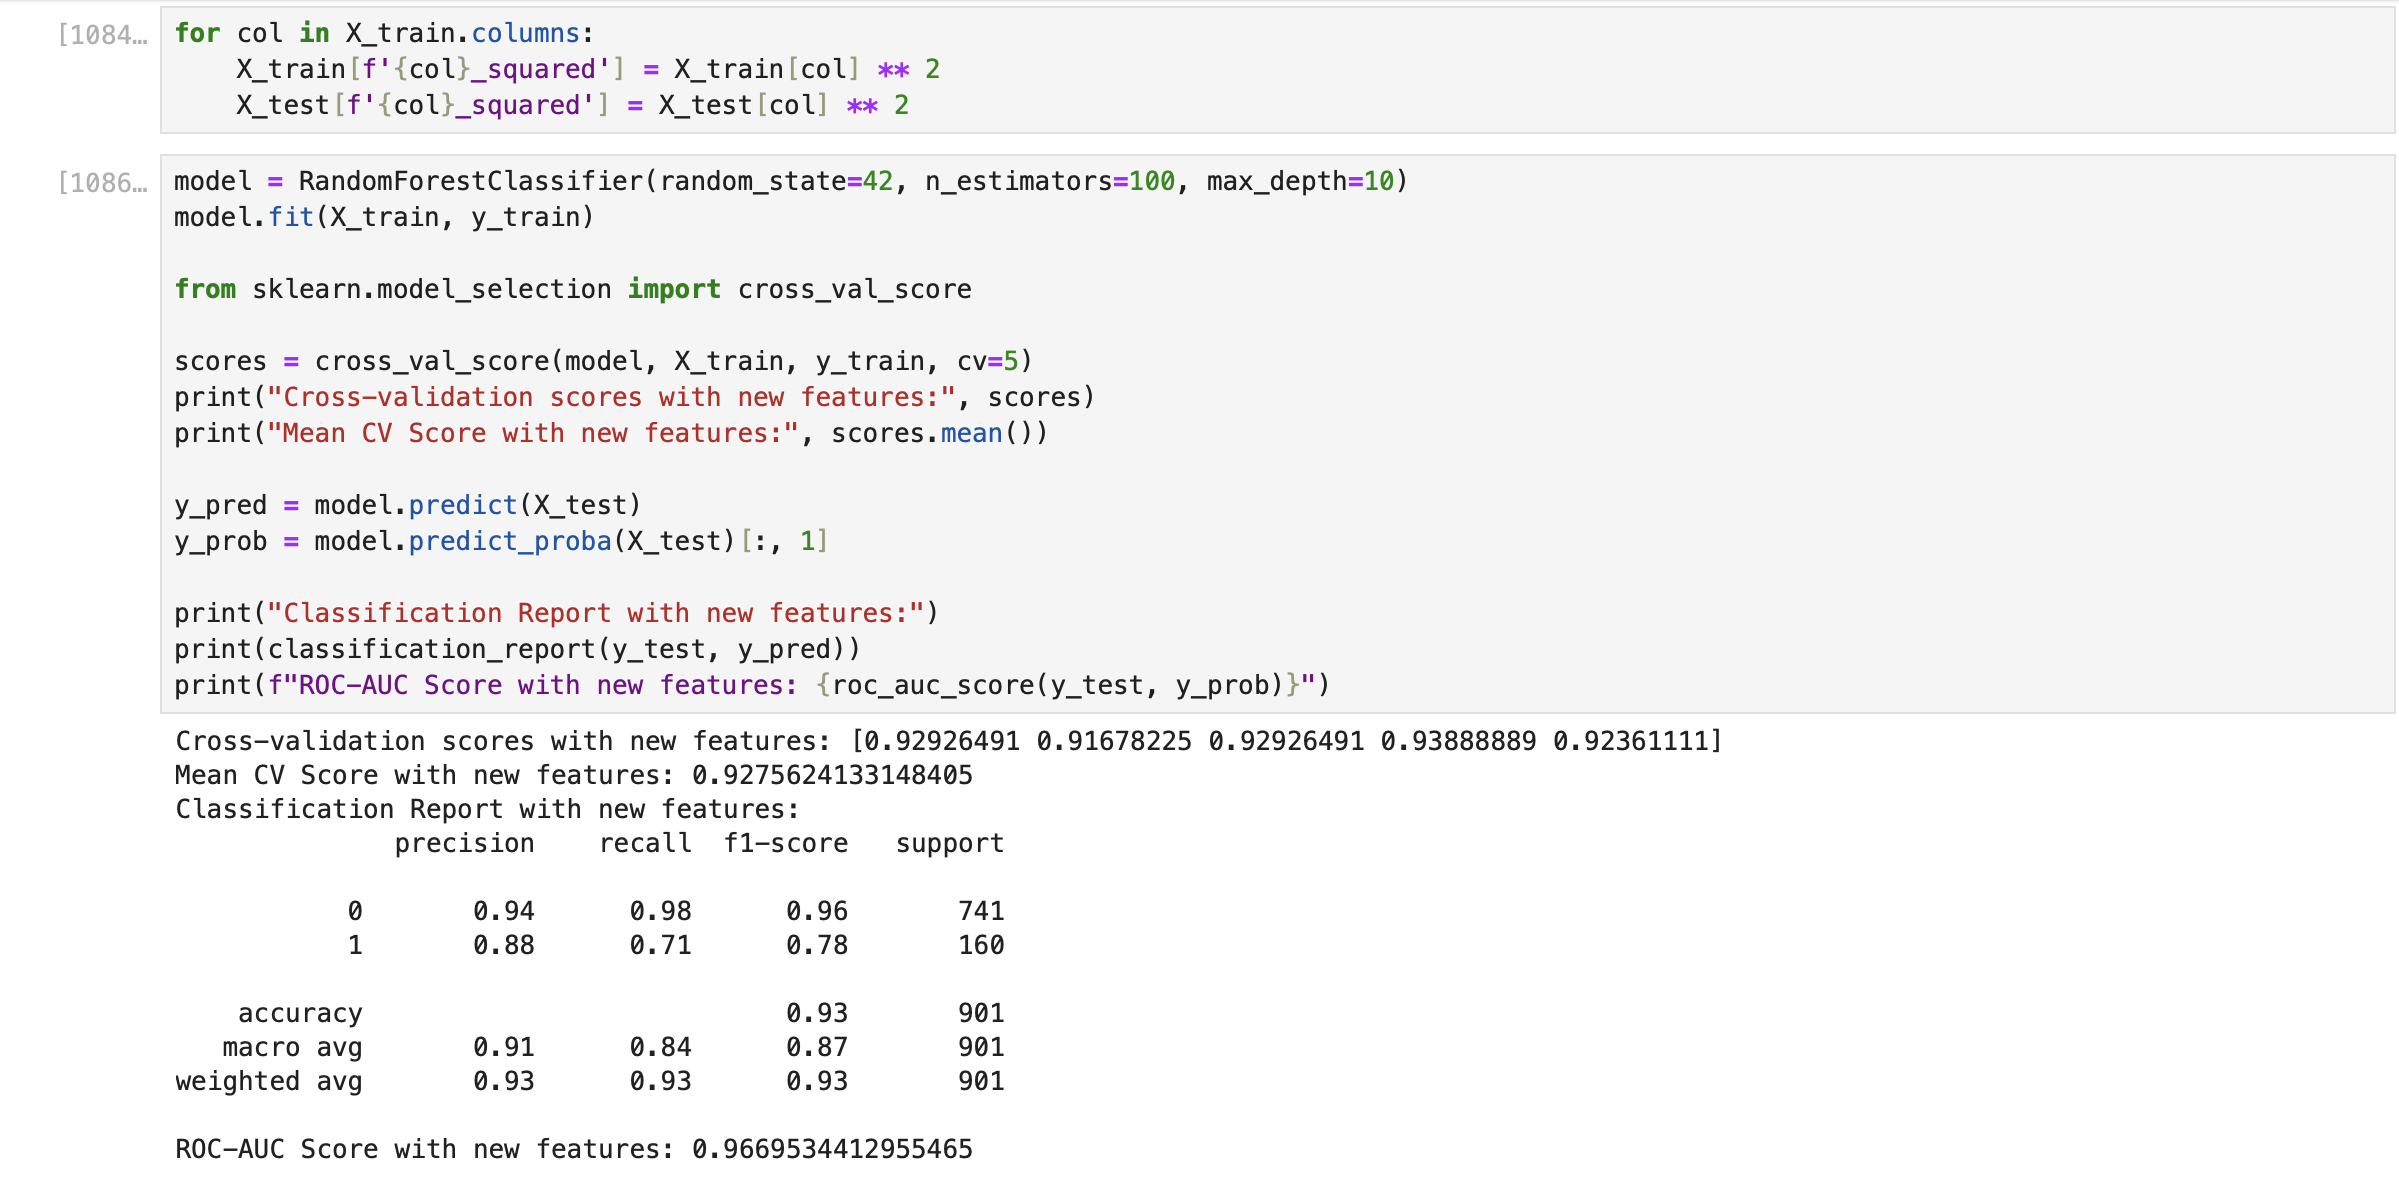

In [3084]:
Image("add_features_1.png")

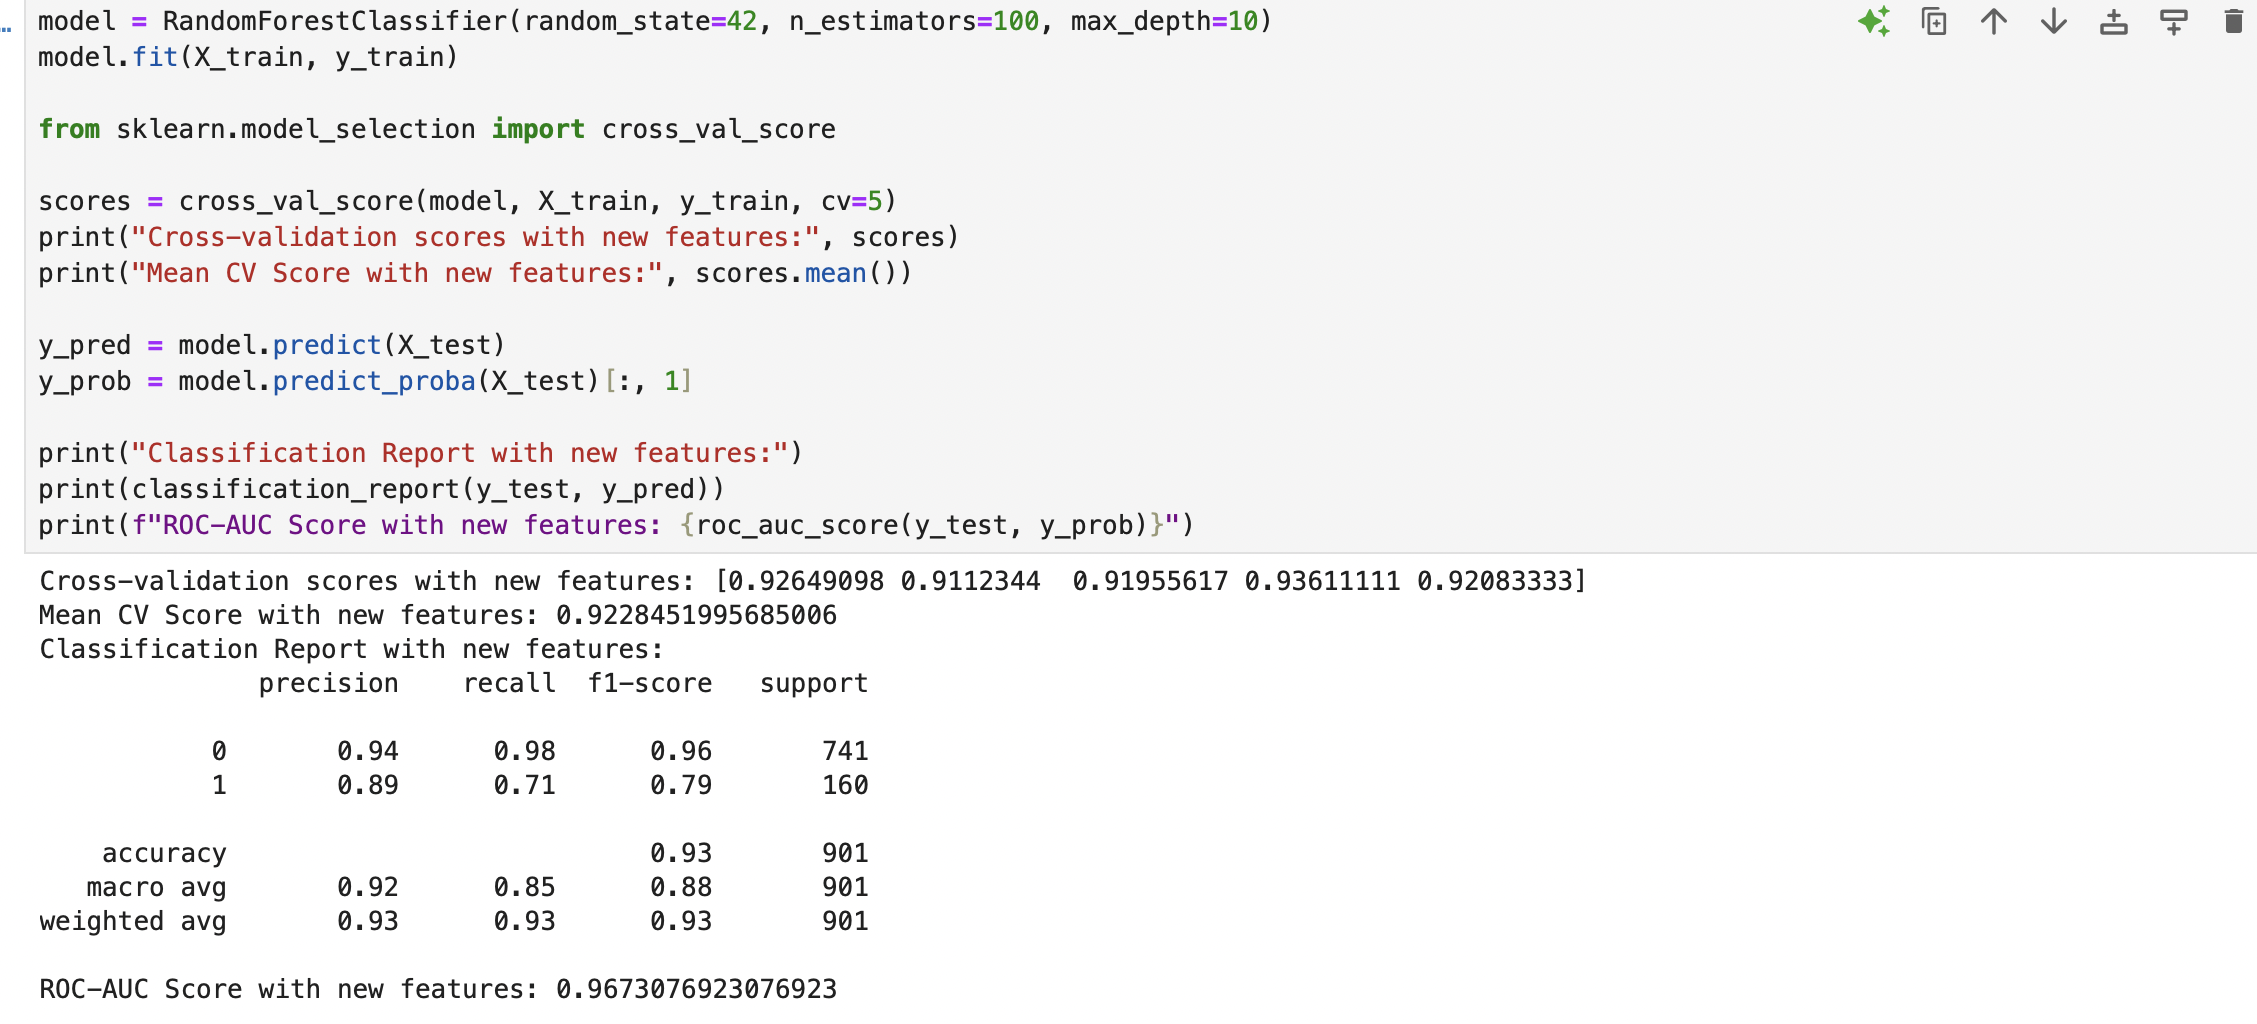

In [3086]:
Image("add_features_2.png")

After adding features using various methods, the model demonstrated worse results, so we will use the version of the model before introducing new features.

<h2>Identifying the target audience for discount allocation.</h2>

We load new user data for which churn probability needs to be determined. We clean the data and convert it to a standardized format.

In [3091]:
df = pd.read_csv("new_data_churn.csv")

In [3093]:
df
original_data = pd.read_csv("new_data_churn.csv")

In [3095]:
missing_values = df.isna().sum()
missing_values

CustomerID                      0
Tenure                         48
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                48
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 49
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    49
CouponUsed                     53
OrderCount                     51
DaySinceLastOrder              77
CashbackAmount                  0
dtype: int64

In [3097]:
columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for column in columns:
    df[column].fillna(df[column].median(), inplace=True)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/4036224504.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [3099]:
df.isna().sum()

CustomerID                     0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [3101]:
df.duplicated().sum()

0

In [3103]:
df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [3105]:
scaler = RobustScaler()
df['Tenure'] = scaler.fit_transform(df[['Tenure']])
df['WarehouseToHome'] = scaler.fit_transform(df[['WarehouseToHome']])
df['CashbackAmount'] = scaler.fit_transform(df[['CashbackAmount']])
df['NumberOfAddress'] = scaler.fit_transform(df[['NumberOfAddress']])
df['OrderAmountHikeFromlastYear'] = scaler.fit_transform(df[['OrderAmountHikeFromlastYear']])
df['CouponUsed'] = scaler.fit_transform(df[['CouponUsed']])
df['OrderCount'] = scaler.fit_transform(df[['OrderCount']])
df['DaySinceLastOrder'] = scaler.fit_transform(df[['DaySinceLastOrder']])

scaler = MinMaxScaler()
df['HourSpendOnApp'] = scaler.fit_transform(df[['HourSpendOnApp']])
df['NumberOfDeviceRegistered'] = scaler.fit_transform(df[['NumberOfDeviceRegistered']])
df['SatisfactionScore'] = scaler.fit_transform(df[['SatisfactionScore']])

df['Tenure'] = scaler.fit_transform(df[['Tenure']])
df['WarehouseToHome'] = scaler.fit_transform(df[['WarehouseToHome']])
df['CashbackAmount'] = scaler.fit_transform(df[['CashbackAmount']])
df['NumberOfAddress'] = scaler.fit_transform(df[['NumberOfAddress']])
df['OrderAmountHikeFromlastYear'] = scaler.fit_transform(df[['OrderAmountHikeFromlastYear']])
df['CouponUsed'] = scaler.fit_transform(df[['CouponUsed']])
df['OrderCount'] = scaler.fit_transform(df[['OrderCount']])
df['DaySinceLastOrder'] = scaler.fit_transform(df[['DaySinceLastOrder']])

In [3107]:
df

CustomerID    Tenure  WarehouseToHome  HourSpendOnApp  \
0          54332  0.032258         0.033333        1.000000   
1          51989  0.483871         0.100000        0.666667   
2          53444  0.419355         0.766667        0.666667   
3          54560  0.161290         0.033333        1.000000   
4          54899  0.419355         0.033333        1.000000   
...          ...       ...              ...             ...   
1121       53741  0.516129         0.333333        1.000000   
1122       50834  0.225806         0.300000        0.333333   
1123       54442  0.516129         0.033333        0.333333   
1124       54491  0.548387         0.366667        0.666667   
1125       52843  0.870968         0.233333        0.666667   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          1.0               1.00             0.05         0   
1                          0.0               0.00             0.10         1   
2                          0.6               1.00             0.10         1   
3                          0.8               1.00             0.10         0   
4                          0.8               0.00             0.10         0   
...                        ...                ...              ...       ...   
1121                       0.6               0.00             0.10         0   
1122                       0.4               0.25             0.00         0   
1123                       0.6               0.50             0.10         0   
1124                       0.8               0.50             0.10         0   
1125                       0.6               0.50             0.15         1   

      OrderAmountHikeFromlastYear  CouponUsed  ...  Gender_Male  \
0                        0.733333      0.1250  ...            0   
1                        0.133333      0.0625  ...            0   
2                        0.200000      0.1250  ...            0   
3                        0.133333      0.2500  ...            1   
4                        0.400000      0.6250  ...            0   
...                           ...         ...  ...          ...   
1121                     0.200000      0.3125  ...            0   
1122                     0.000000      0.0625  ...            1   
1123                     1.000000      0.4375  ...            1   
1124                     0.066667      0.1250  ...            0   
1125                     0.666667      0.0625  ...            1   

      PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                            0                         0   
1                            0                         0   
2                            1                         0   
3                            0                         0   
4                            0                         1   
...                        ...                       ...   
1121                         0                         0   
1122                         1                         0   
1123                         0                         0   
1124                         0                         0   
1125                         0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                       0                        0   
1                                       1                        0   
2                                       0                        0   
3                                       0                        0   
4                                       0                        0   
...                                   ...                      ...   
1121                                    0                        0   
1122                                    0                        0   
1123                                    1                        0   
1124                                    1                     

In [3109]:
df = df[X_train.columns]

In [3111]:
df['Churn_Probability'] = model.predict_proba(df)[:, 1]
df['Churn_Prediction'] = (df['Churn_Probability'] >= optimal_threshold).astype(int)

In [3113]:
df = df.merge(original_data[['CustomerID']], left_index=True, right_index=True, how='left')
df = df[[df.columns[-1]] + list(df.columns[:-1])]
df

CustomerID    Tenure  WarehouseToHome  HourSpendOnApp  \
0          54332  0.032258         0.033333        1.000000   
1          51989  0.483871         0.100000        0.666667   
2          53444  0.419355         0.766667        0.666667   
3          54560  0.161290         0.033333        1.000000   
4          54899  0.419355         0.033333        1.000000   
...          ...       ...              ...             ...   
1121       53741  0.516129         0.333333        1.000000   
1122       50834  0.225806         0.300000        0.333333   
1123       54442  0.516129         0.033333        0.333333   
1124       54491  0.548387         0.366667        0.666667   
1125       52843  0.870968         0.233333        0.666667   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          1.0               1.00             0.05         0   
1                          0.0               0.00             0.10         1   
2                          0.6               1.00             0.10         1   
3                          0.8               1.00             0.10         0   
4                          0.8               0.00             0.10         0   
...                        ...                ...              ...       ...   
1121                       0.6               0.00             0.10         0   
1122                       0.4               0.25             0.00         0   
1123                       0.6               0.50             0.10         0   
1124                       0.8               0.50             0.10         0   
1125                       0.6               0.50             0.15         1   

      OrderAmountHikeFromlastYear  CouponUsed  ...  PreferedOrderCat_Grocery  \
0                        0.733333      0.1250  ...                         0   
1                        0.133333      0.0625  ...                         0   
2                        0.200000      0.1250  ...                         0   
3                        0.133333      0.2500  ...                         0   
4                        0.400000      0.6250  ...                         1   
...                           ...         ...  ...                       ...   
1121                     0.200000      0.3125  ...                         0   
1122                     0.000000      0.0625  ...                         0   
1123                     1.000000      0.4375  ...                         0   
1124                     0.066667      0.1250  ...                         0   
1125                     0.666667      0.0625  ...                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                       0                        0   
1                                       1                        0   
2                                       0                        0   
3                                       0                        0   
4                                       0                        0   
...                                   ...                      ...   
1121                                    0                        0   
1122                                    0                        0   
1123                                    1                        0   
1124                                    1                        0   
1125                                    1                        0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                                 1                        0   
1                                 0                        0   
2                                 0                        0   
3                                 1                        0   
4                                 0                        0   
...                             ...                      ...   
1121                              1   

For further analysis, we will divide customers into two groups:
1) Medium churn probability ranging from 0.3 to the threshold of 0.47.
2) High churn probability exceeding the threshold of 0.47.

In [3116]:
medium_risk_customers = df[(df['Churn_Probability'] > 0.3) & (df['Churn_Probability'] < 0.47)]

high_risk_customers = df[df['Churn_Probability'] >= 0.47]

medium_risk_customers.to_csv('medium_risk_customers.csv', index=False)
high_risk_customers.to_csv('high_risk_customers.csv', index=False)

print(f"Number of customers with a medium churn risk.: {len(medium_risk_customers)}")
print(f"Number of customers with a high churn risk.: {len(high_risk_customers)}")

Number of customers with a medium churn risk.: 59
Number of customers with a high churn risk.: 101


In [3118]:
high_risk_customers

CustomerID    Tenure  WarehouseToHome  HourSpendOnApp  \
15         50912  0.000000         0.066667        0.666667   
16         50081  0.000000         0.900000        0.333333   
32         50291  0.000000         0.250000        0.333333   
46         53397  0.129032         0.833333        1.000000   
56         51781  0.000000         0.500000        0.333333   
...          ...       ...              ...             ...   
1026       52358  0.290323         0.033333        0.333333   
1042       54268  0.032258         0.200000        0.666667   
1045       55536  0.032258         0.200000        0.666667   
1083       52146  0.000000         0.250000        0.333333   
1092       51225  0.000000         0.000000        0.666667   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
15                         0.4               0.00             0.30         1   
16                         0.4               0.25             0.05         0   
32                         0.8               0.50             0.00         0   
46                         0.2               0.75             0.25         1   
56                         0.4               0.50             0.35         1   
...                        ...                ...              ...       ...   
1026                       0.8               0.50             0.05         0   
1042                       0.8               0.50             0.10         1   
1045                       0.2               0.50             0.20         1   
1083                       0.6               0.75             0.05         0   
1092                       0.6               0.50             0.05         1   

      OrderAmountHikeFromlastYear  CouponUsed  ...  PreferedOrderCat_Grocery  \
15                       0.133333      0.1250  ...                         0   
16                       0.733333      0.0625  ...                         0   
32                       0.333333      0.0625  ...                         0   
46                       0.400000      0.1250  ...                         1   
56                       0.066667      0.1875  ...                         0   
...                           ...         ...  ...                       ...   
1026                     0.066667      0.0000  ...                         0   
1042                     0.066667      0.0625  ...                         0   
1045                     0.266667      0.0625  ...                         0   
1083                     0.266667      0.0625  ...                         0   
1092                     0.133333      0.0000  ...                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
15                                      0                        0   
16                                      0                        0   
32                                      0                        1   
46                                      0                        0   
56                                      0                        0   
...                                   ...                      ...   
1026                                    0                        0   
1042                                    1                        0   
1045                                    0                        0   
1083                                    0                        1   
1092                                    0                        1   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
15                                1                        0   
16                                0                        0   
32                                0                        0   
46                                0                        0   
56                                0                        0   
...                             ...                      ...   
1026                              1   

In [3120]:
original_min = 0  
original_max = 61   
high_risk_customers['Tenure'] = high_risk_customers['Tenure'] * (original_max - original_min) + original_min

original_min = 1  
original_max = 16   
high_risk_customers['OrderCount'] = high_risk_customers['OrderCount'] * (original_max - original_min) + original_min

original_min = 0  
original_max = 46   
high_risk_customers['DaySinceLastOrder'] = high_risk_customers['DaySinceLastOrder'] * (original_max - original_min) + original_min

original_min = 11  
original_max = 26   
high_risk_customers['OrderAmountHikeFromlastYear'] = high_risk_customers['OrderAmountHikeFromlastYear'] * (original_max - original_min) + original_min

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2560947129.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2560947129.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/2560947129.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

We segment customers based on Tenure, SatisfactionScore, OrderCount, OrderAmountHikeFromLastYear, and DaysSinceLastOrder.

In [3123]:
def segment_by_tenure(tenure):
    if tenure <= 1:
        return 'New'
    elif 1 < tenure <= 3:
        return 'Regular'
    elif 3 < tenure <= 10:
        return 'Loyal'
    else:
        return 'Very Loyal'

In [3125]:
def segment_by_satisfaction(score):
    if score < 0.4:
        return 'Low'
    elif 0.4 <= score < 0.7:
        return 'Medium'
    elif 0.7 <= score < 0.9:
        return 'High'
    else:
        return 'Very High'

In [3127]:
def segment_by_order_count(order_count):
    if order_count <= 1:
        return 'Low'
    elif 1 < order_count <= 3:
        return 'Medium'
    elif 3 < order_count <= 5:
        return 'High'
    else:
        return 'Very High'

In [3129]:
def segment_by_days(days):
    if days <= 3:
        return 'Recent'
    elif 3 < days <= 7:
        return 'Moderate'
    elif 7 < days <= 21:
        return 'Inactive'
    else:
        return 'Dormant'

In [3131]:
def segment_by_order_hike(hike):
    if hike <= 13:
        return 'Low Increase'
    elif 15 < hike <= 18:
        return 'Moderate Increase'
    elif 20 < hike <= 23:
        return 'High Increase'
    else:
        return 'Very High Increase'

In [3133]:
high_risk_customers['Satisfaction_Segment'] = high_risk_customers['SatisfactionScore'].apply(segment_by_satisfaction)
high_risk_customers['OrderCount_Segment'] = high_risk_customers['OrderCount'].apply(segment_by_order_count)
high_risk_customers['Days_Segment'] = high_risk_customers['DaySinceLastOrder'].apply(segment_by_days)
high_risk_customers['Tenure_Segment'] = high_risk_customers['Tenure'].apply(segment_by_tenure)
high_risk_customers['OrderHike_Segment'] = high_risk_customers['OrderAmountHikeFromlastYear'].apply(segment_by_order_hike)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3188860571.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3188860571.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3188860571.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [3135]:
high_risk_customers

CustomerID     Tenure  WarehouseToHome  HourSpendOnApp  \
15         50912   0.000000         0.066667        0.666667   
16         50081   0.000000         0.900000        0.333333   
32         50291   0.000000         0.250000        0.333333   
46         53397   7.870968         0.833333        1.000000   
56         51781   0.000000         0.500000        0.333333   
...          ...        ...              ...             ...   
1026       52358  17.709677         0.033333        0.333333   
1042       54268   1.967742         0.200000        0.666667   
1045       55536   1.967742         0.200000        0.666667   
1083       52146   0.000000         0.250000        0.333333   
1092       51225   0.000000         0.000000        0.666667   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
15                         0.4               0.00             0.30         1   
16                         0.4               0.25             0.05         0   
32                         0.8               0.50             0.00         0   
46                         0.2               0.75             0.25         1   
56                         0.4               0.50             0.35         1   
...                        ...                ...              ...       ...   
1026                       0.8               0.50             0.05         0   
1042                       0.8               0.50             0.10         1   
1045                       0.2               0.50             0.20         1   
1083                       0.6               0.75             0.05         0   
1092                       0.6               0.50             0.05         1   

      OrderAmountHikeFromlastYear  CouponUsed  ...  MaritalStatus_Divorced  \
15                           13.0      0.1250  ...                       1   
16                           22.0      0.0625  ...                       1   
32                           16.0      0.0625  ...                       0   
46                           17.0      0.1250  ...                       0   
56                           12.0      0.1875  ...                       0   
...                           ...         ...  ...                     ...   
1026                         12.0      0.0000  ...                       0   
1042                         12.0      0.0625  ...                       0   
1045                         15.0      0.0625  ...                       0   
1083                         15.0      0.0625  ...                       0   
1092                         13.0      0.0000  ...                       0   

      MaritalStatus_Married  MaritalStatus_Single  Churn_Probability  \
15                        0                     0               0.64   
16                        0                     0               0.66   
32                        1                     0               0.60   
46                        0                     1               0.69   
56                        1                     0               0.67   
...                     ...                   ...                ...   
1026                      0                     1               0.72   
1042                      0                     1               0.55   
1045                      0                     1               0.51   
1083                      1                     0               0.63   
1092                      1                     0               0.69   

      Churn_Prediction  Satisfaction_Segment  OrderCount_Segment  \
15                   1                   Low              Medium   
16                   1                   Low                 Low   
32                   1                Medium                 Low   
46                   1                  High              Medium   
56                   1                Medium              Medium   
...                ...                   ...                 ...  

Evaluation of the financial feasibility of providing discounts.

In [3138]:
segment_analysis = high_risk_customers.groupby(['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment']).agg({
    'Churn_Probability': 'mean',
    'OrderCount': 'mean',
}).reset_index()

In [3140]:
segment_analysis

Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0           Loyal                 High                Low       Recent   
1           Loyal                 High             Medium       Recent   
2           Loyal                  Low                Low     Inactive   
3           Loyal               Medium          Very High     Inactive   
4           Loyal            Very High                Low       Recent   
..            ...                  ...                ...          ...   
66     Very Loyal            Very High                Low     Moderate   
67     Very Loyal            Very High                Low       Recent   
68     Very Loyal            Very High             Medium     Moderate   
69     Very Loyal            Very High             Medium       Recent   
70     Very Loyal            Very High          Very High      Dormant   

     OrderHike_Segment  Churn_Probability  OrderCount  
0         Low Increase               0.77         1.0  
1    Moderate Increase               0.69         2.0  
2         Low Increase               0.57         1.0  
3   Very High Increase               0.48        16.0  
4        High Increase               0.78         1.0  
..                 ...                ...         ...  
66  Very High Increase               0.47         1.0  
67       High Increase               0.51         1.0  
68  Very High Increase               0.58         3.0  
69  Very High Increase               0.52         2.0  
70        Low Increase               0.49        14.0  

[71 rows x 7 columns]

In [3142]:
segment_analysis['Potential_Loss'] = segment_analysis['OrderCount'] * segment_analysis['Churn_Probability']
discount_percentage = 0.25
segment_analysis['Retention_Effect'] = segment_analysis['Potential_Loss'] * (1 - discount_percentage)
segment_analysis['Retention_ROI'] = segment_analysis['Retention_Effect'] / discount_percentage

In [3144]:
profitable_segments = segment_analysis[segment_analysis['Retention_ROI'] > 1]
print("Segments where discounts are justified.")
profitable_segments

Segments where discounts are justified.


Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0           Loyal                 High                Low       Recent   
1           Loyal                 High             Medium       Recent   
2           Loyal                  Low                Low     Inactive   
3           Loyal               Medium          Very High     Inactive   
4           Loyal            Very High                Low       Recent   
..            ...                  ...                ...          ...   
66     Very Loyal            Very High                Low     Moderate   
67     Very Loyal            Very High                Low       Recent   
68     Very Loyal            Very High             Medium     Moderate   
69     Very Loyal            Very High             Medium       Recent   
70     Very Loyal            Very High          Very High      Dormant   

     OrderHike_Segment  Churn_Probability  OrderCount  Potential_Loss  \
0         Low Increase               0.77         1.0            0.77   
1    Moderate Increase               0.69         2.0            1.38   
2         Low Increase               0.57         1.0            0.57   
3   Very High Increase               0.48        16.0            7.68   
4        High Increase               0.78         1.0            0.78   
..                 ...                ...         ...             ...   
66  Very High Increase               0.47         1.0            0.47   
67       High Increase               0.51         1.0            0.51   
68  Very High Increase               0.58         3.0            1.74   
69  Very High Increase               0.52         2.0            1.04   
70        Low Increase               0.49        14.0            6.86   

    Retention_Effect  Retention_ROI  
0             0.5775           2.31  
1             1.0350           4.14  
2             0.4275           1.71  
3             5.7600          23.04  
4             0.5850           2.34  
..               ...            ...  
66            0.3525           1.41  
67            0.3825           1.53  
68            1.3050           5.22  
69            0.7800           3.12  
70            5.1450          20.58  

[71 rows x 10 columns]

<h3>Development of a discount allocation strategy.</h3>

In [3147]:
def assign_discount(roi):
    if roi > 2.7: 
        return 10
    elif 2.3 <= roi <= 2.7:
        return 15
    elif 1.9 <= roi < 2.3: 
        return 20
    elif 1.6 <= roi < 1.9:
        return 25
    else:  
        return 30

segment_analysis['Discount_Percentage'] = segment_analysis['Retention_ROI'].apply(assign_discount)

segment_analysis[['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment', 'Discount_Percentage']]

Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0           Loyal                 High                Low       Recent   
1           Loyal                 High             Medium       Recent   
2           Loyal                  Low                Low     Inactive   
3           Loyal               Medium          Very High     Inactive   
4           Loyal            Very High                Low       Recent   
..            ...                  ...                ...          ...   
66     Very Loyal            Very High                Low     Moderate   
67     Very Loyal            Very High                Low       Recent   
68     Very Loyal            Very High             Medium     Moderate   
69     Very Loyal            Very High             Medium       Recent   
70     Very Loyal            Very High          Very High      Dormant   

     OrderHike_Segment  Discount_Percentage  
0         Low Increase                   15  
1    Moderate Increase                   10  
2         Low Increase                   25  
3   Very High Increase                   10  
4        High Increase                   15  
..                 ...                  ...  
66  Very High Increase                   30  
67       High Increase                   30  
68  Very High Increase                   10  
69  Very High Increase                   10  
70        Low Increase                   10  

[71 rows x 6 columns]

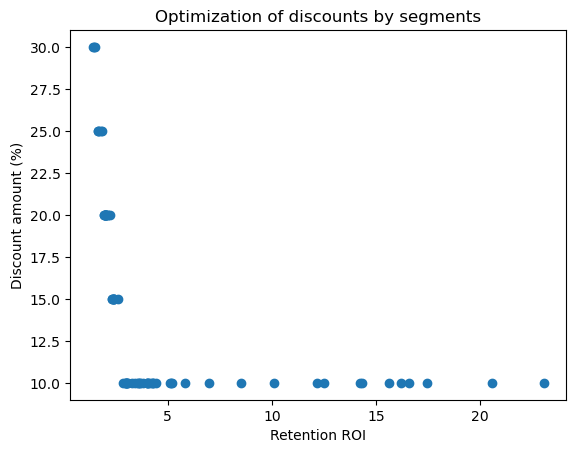

In [3151]:
plt.scatter(segment_analysis['Retention_ROI'], segment_analysis['Discount_Percentage'])
plt.xlabel('Retention ROI')
plt.ylabel('Discount amount (%)')
plt.title('Optimization of discounts by segments')
plt.show()

In [3153]:
df = high_risk_customers.merge(segment_analysis[['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment', 'Discount_Percentage']], 
            on=['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment'], 
            how='left')

print(df[['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment', 'Discount_Percentage']].head())

  Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0            New                  Low             Medium       Recent   
1            New                  Low                Low     Inactive   
2            New               Medium                Low       Recent   
3          Loyal                 High             Medium       Recent   
4            New               Medium             Medium     Inactive   

   OrderHike_Segment  Discount_Percentage  
0       Low Increase                   10  
1      High Increase                   20  
2  Moderate Increase                   20  
3  Moderate Increase                   10  
4       Low Increase                   10  


In [3155]:
low_discount_users = df[df['Discount_Percentage'] == 10]
medium_discount_users = df[df['Discount_Percentage'] == 15]
high_discount_users = df[df['Discount_Percentage'] >= 20]

print(f"Customers with a 10% discount.: {len(low_discount_users)}")
print(f"Customers with a 15% discount.: {len(medium_discount_users)}")
print(f"Customers with a 20% or greater discount: {len(high_discount_users)}")

Customers with a 10% discount.: 53
Customers with a 15% discount.: 13
Customers with a 20% or greater discount: 35


In [3157]:
df

CustomerID     Tenure  WarehouseToHome  HourSpendOnApp  \
0         50912   0.000000         0.066667        0.666667   
1         50081   0.000000         0.900000        0.333333   
2         50291   0.000000         0.250000        0.333333   
3         53397   7.870968         0.833333        1.000000   
4         51781   0.000000         0.500000        0.333333   
..          ...        ...              ...             ...   
96        52358  17.709677         0.033333        0.333333   
97        54268   1.967742         0.200000        0.666667   
98        55536   1.967742         0.200000        0.666667   
99        52146   0.000000         0.250000        0.333333   
100       51225   0.000000         0.000000        0.666667   

     NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         0.4               0.00             0.30         1   
1                         0.4               0.25             0.05         0   
2                         0.8               0.50             0.00         0   
3                         0.2               0.75             0.25         1   
4                         0.4               0.50             0.35         1   
..                        ...                ...              ...       ...   
96                        0.8               0.50             0.05         0   
97                        0.8               0.50             0.10         1   
98                        0.2               0.50             0.20         1   
99                        0.6               0.75             0.05         0   
100                       0.6               0.50             0.05         1   

     OrderAmountHikeFromlastYear  CouponUsed  ...  MaritalStatus_Married  \
0                           13.0      0.1250  ...                      0   
1                           22.0      0.0625  ...                      0   
2                           16.0      0.0625  ...                      1   
3                           17.0      0.1250  ...                      0   
4                           12.0      0.1875  ...                      1   
..                           ...         ...  ...                    ...   
96                          12.0      0.0000  ...                      0   
97                          12.0      0.0625  ...                      0   
98                          15.0      0.0625  ...                      0   
99                          15.0      0.0625  ...                      1   
100                         13.0      0.0000  ...                      1   

     MaritalStatus_Single  Churn_Probability  Churn_Prediction  \
0                       0               0.64                 1   
1                       0               0.66                 1   
2                       0               0.60                 1   
3                       1               0.69                 1   
4                       0               0.67                 1   
..                    ...                ...               ...   
96                      1               0.72                 1   
97                      1               0.55                 1   
98                      1               0.51                 1   
99                      0               0.63                 1   
100                     0               0.69                 1   

     Satisfaction_Segment  OrderCount_Segment  Days_Segment  Tenure_Segment  \
0                     Low              Medium        Recent             New   
1                     Low                 Low      Inactive             New   
2                  Medium                 Low        Recent             New   
3                    High              Medium        Recent           Loyal   
4                  Medium              Medium      Inactive             New   
..                    ...                 ...           ...             ...   
96                 Medium               

In [3159]:
df.to_csv('customer_discounts_high_risk.csv', index=False)

In [3161]:
medium_risk_customers

CustomerID    Tenure  WarehouseToHome  HourSpendOnApp  \
19         52893  0.258065         0.366667        0.666667   
57         52349  0.000000         0.033333        0.333333   
68         50024  0.000000         0.666667        0.666667   
90         55218  0.032258         0.466667        0.666667   
104        54940  0.483871         0.166667        0.666667   
119        53888  0.032258         0.333333        0.666667   
128        50725  0.193548         0.300000        0.333333   
129        50009  0.419355         0.100000        0.666667   
130        54723  0.032258         0.033333        1.000000   
249        51122  0.290323         0.266667        0.666667   
251        54752  0.032258         0.566667        1.000000   
270        54950  0.258065         0.033333        1.000000   
288        54708  0.193548         0.666667        0.666667   
326        52657  0.290323         0.466667        0.333333   
360        52174  0.290323         0.266667        0.666667   
383        51558  0.000000         0.666667        0.333333   
400        50897  0.000000         0.300000        0.666667   
401        52827  0.387097         0.033333        1.000000   
438        52108  0.290323         0.066667        0.333333   
447        50738  0.290323         0.566667        0.666667   
501        51666  0.000000         0.066667        0.666667   
522        54375  0.032258         0.133333        0.666667   
525        52930  0.032258         0.033333        1.000000   
551        54363  0.258065         0.366667        0.666667   
583        53400  0.032258         0.333333        0.666667   
584        53962  0.032258         0.266667        0.666667   
590        50752  0.000000         0.700000        0.666667   
619        51098  0.290323         0.733333        0.333333   
627        53892  0.032258         0.300000        1.000000   
628        54727  0.354839         0.933333        1.000000   
634        55003  0.032258         0.433333        1.000000   
638        53253  0.032258         0.033333        1.000000   
648        50273  0.000000         0.133333        0.333333   
712        55323  0.032258         0.366667        0.666667   
716        53411  0.032258         0.766667        0.666667   
726        52367  0.000000         0.300000        0.666667   
741        50735  0.290323         0.500000        0.666667   
752        52925  0.032258         0.500000        0.666667   
762        53327  0.032258         0.866667        1.000000   
767        53170  0.032258         0.266667        0.666667   
780        53358  0.161290         0.100000        0.666667   
782        52318  0.290323         0.033333        0.666667   
838        50747  0.290323         0.566667        0.666667   
846        53009  0.032258         0.200000        0.666667   
850        50150  0.000000         0.100000        0.666667   
876        55434  0.032258         0.300000        1.000000   
915        53927  0.032258         0.466667        1.000000   
916        53989  0.322581         0.733333        1.000000   
919        51510  0.000000         0.250000        0.666667   
920        51187  0.290323         0.466667        0.333333   
956        52073  0.000000         0.166667        0.666667   
957        54530  0.161290         0.333333        0.666667   
958        50355  0.000000         0.233333        0.666667   
1027       51380  0.290323         0.000000        0.666667   
1064       53657  0.677419         0.266667        0.666667   
1067       53555  0.161290         0.200000        1.000000   
1084       55583  0.290323         0.400000        0.666667   
1086       54161  0.161290         0.033333        1.000000   
1120       52342  0.000000         0.333333        0.666667   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
19                         0.6               0.50             0.10         1   
57                         0.4               0.00             0.2

In [3163]:
original_min = 0  
original_max = 61   
medium_risk_customers['Tenure'] = medium_risk_customers['Tenure'] * (original_max - original_min) + original_min

original_min = 1  
original_max = 16   
medium_risk_customers['OrderCount'] = medium_risk_customers['OrderCount'] * (original_max - original_min) + original_min

original_min = 0  
original_max = 46   
medium_risk_customers['DaySinceLastOrder'] = medium_risk_customers['DaySinceLastOrder'] * (original_max - original_min) + original_min

original_min = 11  
original_max = 26   
medium_risk_customers['OrderAmountHikeFromlastYear'] = medium_risk_customers['OrderAmountHikeFromlastYear'] * (original_max - original_min) + original_min

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3227749764.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3227749764.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/3227749764.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [3165]:
medium_risk_customers['Satisfaction_Segment'] = medium_risk_customers['SatisfactionScore'].apply(segment_by_satisfaction)
medium_risk_customers['OrderCount_Segment'] = medium_risk_customers['OrderCount'].apply(segment_by_order_count)
medium_risk_customers['Days_Segment'] = medium_risk_customers['DaySinceLastOrder'].apply(segment_by_days)
medium_risk_customers['Tenure_Segment'] = medium_risk_customers['Tenure'].apply(segment_by_tenure)
medium_risk_customers['OrderHike_Segment'] = medium_risk_customers['OrderAmountHikeFromlastYear'].apply(segment_by_order_hike)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/4000244376.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/4000244376.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13263/4000244376.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [3167]:
segment_analysis = medium_risk_customers.groupby(['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment']).agg({
    'Churn_Probability': 'mean',
    'OrderCount': 'mean',
}).reset_index()

In [3169]:
segment_analysis

Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0           Loyal                 High             Medium     Moderate   
1           Loyal                  Low             Medium     Inactive   
2           Loyal                  Low             Medium       Recent   
3           Loyal            Very High             Medium       Recent   
4             New                  Low               High     Moderate   
5             New                  Low                Low     Moderate   
6             New                  Low                Low       Recent   
7             New                  Low                Low       Recent   
8             New                  Low             Medium       Recent   
9             New               Medium                Low     Inactive   
10            New               Medium                Low     Moderate   
11            New               Medium                Low       Recent   
12            New               Medium                Low       Recent   
13            New               Medium             Medium       Recent   
14            New            Very High             Medium       Recent   
15        Regular                 High             Medium     Moderate   
16        Regular                 High             Medium       Recent   
17        Regular                 High             Medium       Recent   
18        Regular                 High          Very High     Inactive   
19        Regular                  Low             Medium     Inactive   
20        Regular                  Low             Medium       Recent   
21        Regular                  Low          Very High     Inactive   
22        Regular               Medium             Medium     Moderate   
23        Regular               Medium             Medium     Moderate   
24        Regular               Medium             Medium     Moderate   
25        Regular               Medium             Medium       Recent   
26        Regular            Very High             Medium     Inactive   
27        Regular            Very High             Medium     Moderate   
28        Regular            Very High             Medium     Moderate   
29        Regular            Very High             Medium     Moderate   
30        Regular            Very High             Medium     Moderate   
31        Regular            Very High             Medium       Recent   
32        Regular            Very High          Very High     Moderate   
33     Very Loyal                 High               High     Moderate   
34     Very Loyal                 High                Low       Recent   
35     Very Loyal                  Low                Low     Moderate   
36     Very Loyal                  Low                Low       Recent   
37     Very Loyal                  Low                Low       Recent   
38     Very Loyal                  Low             Medium       Recent   
39     Very Loyal               Medium                Low     Moderate   
40     Very Loyal               Medium                Low       Recent   
41     Very Loyal               Medium                Low       Recent   
42     Very Loyal               Medium                Low       Recent   
43     Very Loyal               Medium             Medium     Inactive   
44     Very Loyal               Medium             Medium     Moderate   
45     Very Loyal               Medium             Medium       Recent   
46     Very Loyal               Medium             Medium       Recent   
47     Very Loyal            Very High               High     Moderate   
48     Very Loyal            Very High                Low       Recent   
49     Very Loyal            Very High          Very High     Moderate   

     OrderHike_Segment  Churn_Probability  OrderCount  
0    Moderate Increase           0.390000    3.000000  
1         Low Increase           0.320000    2.000000  
2   Very High Increase           0.320000    2.000000  
3   

In [3171]:
segment_analysis['Potential_Loss'] = segment_analysis['OrderCount'] * segment_analysis['Churn_Probability']
discount_percentage = 0.15 
segment_analysis['Retention_Effect'] = segment_analysis['Potential_Loss'] * (1 - discount_percentage)
segment_analysis['Retention_ROI'] = segment_analysis['Retention_Effect'] / discount_percentage

In [3173]:
profitable_segments = segment_analysis[segment_analysis['Retention_ROI'] > 1]
print("Segments where discounts are justified:")
profitable_segments

Segments where discounts are justified:


Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0           Loyal                 High             Medium     Moderate   
1           Loyal                  Low             Medium     Inactive   
2           Loyal                  Low             Medium       Recent   
3           Loyal            Very High             Medium       Recent   
4             New                  Low               High     Moderate   
5             New                  Low                Low     Moderate   
6             New                  Low                Low       Recent   
7             New                  Low                Low       Recent   
8             New                  Low             Medium       Recent   
9             New               Medium                Low     Inactive   
10            New               Medium                Low     Moderate   
11            New               Medium                Low       Recent   
12            New               Medium                Low       Recent   
13            New               Medium             Medium       Recent   
14            New            Very High             Medium       Recent   
15        Regular                 High             Medium     Moderate   
16        Regular                 High             Medium       Recent   
17        Regular                 High             Medium       Recent   
18        Regular                 High          Very High     Inactive   
19        Regular                  Low             Medium     Inactive   
20        Regular                  Low             Medium       Recent   
21        Regular                  Low          Very High     Inactive   
22        Regular               Medium             Medium     Moderate   
23        Regular               Medium             Medium     Moderate   
24        Regular               Medium             Medium     Moderate   
25        Regular               Medium             Medium       Recent   
26        Regular            Very High             Medium     Inactive   
27        Regular            Very High             Medium     Moderate   
28        Regular            Very High             Medium     Moderate   
29        Regular            Very High             Medium     Moderate   
30        Regular            Very High             Medium     Moderate   
31        Regular            Very High             Medium       Recent   
32        Regular            Very High          Very High     Moderate   
33     Very Loyal                 High               High     Moderate   
34     Very Loyal                 High                Low       Recent   
35     Very Loyal                  Low                Low     Moderate   
36     Very Loyal                  Low                Low       Recent   
37     Very Loyal                  Low                Low       Recent   
38     Very Loyal                  Low             Medium       Recent   
39     Very Loyal               Medium                Low     Moderate   
40     Very Loyal               Medium                Low       Recent   
41     Very Loyal               Medium                Low       Recent   
42     Very Loyal               Medium                Low       Recent   
43     Very Loyal               Medium             Medium     Inactive   
44     Very Loyal               Medium             Medium     Moderate   
45     Very Loyal               Medium             Medium       Recent   
46     Very Loyal               Medium             Medium       Recent   
47     Very Loyal            Very High               High     Moderate   
48     Very Loyal            Very High                Low       Recent   
49     Very Loyal            Very High          Very High     Moderate   

     OrderHike_Segment  Churn_Probability  OrderCount  Potential_Loss  \
0    Moderate Increase           0.390000    3.000000        1.170000   
1         Low Increase           0.320000    2.000000        0.640000   
2   Very 

In [3175]:
segment_analysis['Discount_Percentage'] = segment_analysis['Retention_ROI'].apply(assign_discount)

segment_analysis[['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment', 'Discount_Percentage']]

Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0           Loyal                 High             Medium     Moderate   
1           Loyal                  Low             Medium     Inactive   
2           Loyal                  Low             Medium       Recent   
3           Loyal            Very High             Medium       Recent   
4             New                  Low               High     Moderate   
5             New                  Low                Low     Moderate   
6             New                  Low                Low       Recent   
7             New                  Low                Low       Recent   
8             New                  Low             Medium       Recent   
9             New               Medium                Low     Inactive   
10            New               Medium                Low     Moderate   
11            New               Medium                Low       Recent   
12            New               Medium                Low       Recent   
13            New               Medium             Medium       Recent   
14            New            Very High             Medium       Recent   
15        Regular                 High             Medium     Moderate   
16        Regular                 High             Medium       Recent   
17        Regular                 High             Medium       Recent   
18        Regular                 High          Very High     Inactive   
19        Regular                  Low             Medium     Inactive   
20        Regular                  Low             Medium       Recent   
21        Regular                  Low          Very High     Inactive   
22        Regular               Medium             Medium     Moderate   
23        Regular               Medium             Medium     Moderate   
24        Regular               Medium             Medium     Moderate   
25        Regular               Medium             Medium       Recent   
26        Regular            Very High             Medium     Inactive   
27        Regular            Very High             Medium     Moderate   
28        Regular            Very High             Medium     Moderate   
29        Regular            Very High             Medium     Moderate   
30        Regular            Very High             Medium     Moderate   
31        Regular            Very High             Medium       Recent   
32        Regular            Very High          Very High     Moderate   
33     Very Loyal                 High               High     Moderate   
34     Very Loyal                 High                Low       Recent   
35     Very Loyal                  Low                Low     Moderate   
36     Very Loyal                  Low                Low       Recent   
37     Very Loyal                  Low                Low       Recent   
38     Very Loyal                  Low             Medium       Recent   
39     Very Loyal               Medium                Low     Moderate   
40     Very Loyal               Medium                Low       Recent   
41     Very Loyal               Medium                Low       Recent   
42     Very Loyal               Medium                Low       Recent   
43     Very Loyal               Medium             Medium     Inactive   
44     Very Loyal               Medium             Medium     Moderate   
45     Very Loyal               Medium             Medium       Recent   
46     Very Loyal               Medium             Medium       Recent   
47     Very Loyal            Very High               High     Moderate   
48     Very Loyal            Very High                Low       Recent   
49     Very Loyal            Very High          Very High     Moderate   

     OrderHike_Segment  Discount_Percentage  
0    Moderate Increase                   10  
1         Low Increase                   10  
2   Very High Increase                   10  
3    Moderate Increase                   10 

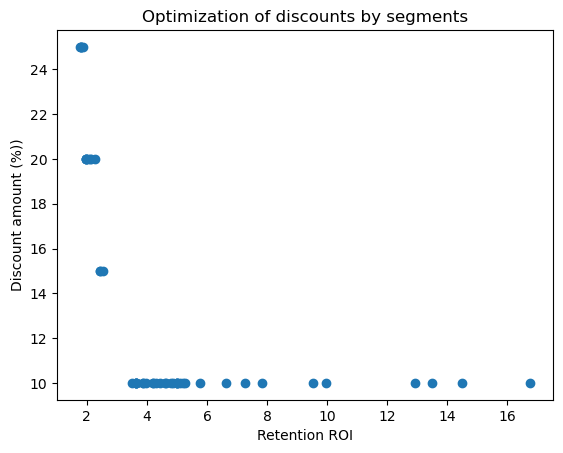

In [3177]:
plt.scatter(segment_analysis['Retention_ROI'], segment_analysis['Discount_Percentage'])
plt.xlabel('Retention ROI')
plt.ylabel('Discount amount (%))')
plt.title('Optimization of discounts by segments')
plt.show()

In [3179]:
df = medium_risk_customers.merge(segment_analysis[['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment', 'Discount_Percentage']], 
            on=['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment'], 
            how='left')

print(df[['Tenure_Segment', 'Satisfaction_Segment', 'OrderCount_Segment', 'Days_Segment', 'OrderHike_Segment', 'Discount_Percentage']].head())

  Tenure_Segment Satisfaction_Segment OrderCount_Segment Days_Segment  \
0     Very Loyal               Medium             Medium       Recent   
1            New                  Low                Low       Recent   
2            New               Medium             Medium       Recent   
3        Regular                 High             Medium       Recent   
4     Very Loyal               Medium             Medium     Inactive   

   OrderHike_Segment  Discount_Percentage  
0  Moderate Increase                   10  
1       Low Increase                   20  
2       Low Increase                   10  
3       Low Increase                   10  
4       Low Increase                   10  


In [3181]:
low_discount_users = df[df['Discount_Percentage'] == 10]
medium_discount_users = df[df['Discount_Percentage'] == 15]
high_discount_users = df[df['Discount_Percentage'] >= 20]

print(f"Customers with a 10% discount: {len(low_discount_users)}")
print(f"Customers with a 15% discount: {len(medium_discount_users)}")
print(f"Customers with a 20% or greater discount: {len(high_discount_users)}")

Customers with a 10% discount: 39
Customers with a 15% discount: 4
Customers with a 20% or greater discount: 16


In [3183]:
df

CustomerID     Tenure  WarehouseToHome  HourSpendOnApp  \
0        52893  15.741935         0.366667        0.666667   
1        52349   0.000000         0.033333        0.333333   
2        50024   0.000000         0.666667        0.666667   
3        55218   1.967742         0.466667        0.666667   
4        54940  29.516129         0.166667        0.666667   
5        53888   1.967742         0.333333        0.666667   
6        50725  11.806452         0.300000        0.333333   
7        50009  25.580645         0.100000        0.666667   
8        54723   1.967742         0.033333        1.000000   
9        51122  17.709677         0.266667        0.666667   
10       54752   1.967742         0.566667        1.000000   
11       54950  15.741935         0.033333        1.000000   
12       54708  11.806452         0.666667        0.666667   
13       52657  17.709677         0.466667        0.333333   
14       52174  17.709677         0.266667        0.666667   
15       51558   0.000000         0.666667        0.333333   
16       50897   0.000000         0.300000        0.666667   
17       52827  23.612903         0.033333        1.000000   
18       52108  17.709677         0.066667        0.333333   
19       50738  17.709677         0.566667        0.666667   
20       51666   0.000000         0.066667        0.666667   
21       54375   1.967742         0.133333        0.666667   
22       52930   1.967742         0.033333        1.000000   
23       54363  15.741935         0.366667        0.666667   
24       53400   1.967742         0.333333        0.666667   
25       53962   1.967742         0.266667        0.666667   
26       50752   0.000000         0.700000        0.666667   
27       51098  17.709677         0.733333        0.333333   
28       53892   1.967742         0.300000        1.000000   
29       54727  21.645161         0.933333        1.000000   
30       55003   1.967742         0.433333        1.000000   
31       53253   1.967742         0.033333        1.000000   
32       50273   0.000000         0.133333        0.333333   
33       55323   1.967742         0.366667        0.666667   
34       53411   1.967742         0.766667        0.666667   
35       52367   0.000000         0.300000        0.666667   
36       50735  17.709677         0.500000        0.666667   
37       52925   1.967742         0.500000        0.666667   
38       53327   1.967742         0.866667        1.000000   
39       53170   1.967742         0.266667        0.666667   
40       53358   9.838710         0.100000        0.666667   
41       52318  17.709677         0.033333        0.666667   
42       50747  17.709677         0.566667        0.666667   
43       53009   1.967742         0.200000        0.666667   
44       50150   0.000000         0.100000        0.666667   
45       55434   1.967742         0.300000        1.000000   
46       53927   1.967742         0.466667        1.000000   
47       53989  19.677419         0.733333        1.000000   
48       51510   0.000000         0.250000        0.666667   
49       51187  17.709677         0.466667        0.333333   
50       52073   0.000000         0.166667        0.666667   
51       54530   9.838710         0.333333        0.666667   
52       50355   0.000000         0.233333        0.666667   
53       51380  17.709677         0.000000        0.666667   
54       53657  41.322581         0.266667        0.666667   
55       53555   9.838710         0.200000        1.000000   
56       55583  17.709677         0.400000        0.666667   
57       54161   9.838710         0.033333        1.000000   
58       52342   0.000000         0.333333        0.666667   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                        0.6               0.50             0.10         1   
1                        0.4               0.00             0.20         0   
2                        0.8               0.50  

In [3185]:
df.to_csv('customer_discounts_medium_risk.csv', index=False)

In [3187]:
df1 = pd.read_csv('customer_discounts_medium_risk.csv')
df2 = pd.read_csv('customer_discounts_high_risk.csv')

df_combined = pd.concat([df1, df2], ignore_index=True)

df_combined.to_csv('customer_discount.csv', index=False)

In [3189]:
df_combined

CustomerID     Tenure  WarehouseToHome  HourSpendOnApp  \
0         52893  15.741935         0.366667        0.666667   
1         52349   0.000000         0.033333        0.333333   
2         50024   0.000000         0.666667        0.666667   
3         55218   1.967742         0.466667        0.666667   
4         54940  29.516129         0.166667        0.666667   
..          ...        ...              ...             ...   
155       52358  17.709677         0.033333        0.333333   
156       54268   1.967742         0.200000        0.666667   
157       55536   1.967742         0.200000        0.666667   
158       52146   0.000000         0.250000        0.333333   
159       51225   0.000000         0.000000        0.666667   

     NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         0.6               0.50             0.10         1   
1                         0.4               0.00             0.20         0   
2                         0.8               0.50             0.15         1   
3                         0.6               0.75             0.30         0   
4                         0.6               0.50             0.50         1   
..                        ...                ...              ...       ...   
155                       0.8               0.50             0.05         0   
156                       0.8               0.50             0.10         1   
157                       0.2               0.50             0.20         1   
158                       0.6               0.75             0.05         0   
159                       0.6               0.50             0.05         1   

     OrderAmountHikeFromlastYear  CouponUsed  ...  MaritalStatus_Married  \
0                           18.0      0.1875  ...                      1   
1                           11.0      0.0000  ...                      1   
2                           11.0      0.0625  ...                      0   
3                           12.0      0.1250  ...                      0   
4                           13.0      0.0625  ...                      1   
..                           ...         ...  ...                    ...   
155                         12.0      0.0000  ...                      0   
156                         12.0      0.0625  ...                      0   
157                         15.0      0.0625  ...                      0   
158                         15.0      0.0625  ...                      1   
159                         13.0      0.0000  ...                      1   

     MaritalStatus_Single  Churn_Probability  Churn_Prediction  \
0                       0               0.31                 0   
1                       0               0.37                 0   
2                       0               0.45                 0   
3                       1               0.35                 0   
4                       0               0.34                 0   
..                    ...                ...               ...   
155                     1               0.72                 1   
156                     1               0.55                 1   
157                     1               0.51                 1   
158                     0               0.63                 1   
159                     0               0.69                 1   

     Satisfaction_Segment  OrderCount_Segment  Days_Segment  Tenure_Segment  \
0                  Medium              Medium        Recent      Very Loyal   
1                     Low                 Low        Recent             New   
2                  Medium              Medium        Recent             New   
3                    High              Medium        Recent         Regular   
4                  Medium              Medium      Inactive      Very Loyal   
..                    ...                 ...           ...             ...   
155                Medium               